## 1. Introduction

---
Nama    : Muhammad Al Ghifari

<div align="justify">

**Objective**

Dataset yang digunakan berisi informasi demografis, perilaku pembelian, dan riwayat partisipasi pelanggan dalam kampanye pemasaran perusahaan FMCG International. Data mencakup atribut seperti usia, pendidikan, status pernikahan, jumlah anak, total pengeluaran untuk berbagai kategori produk, serta keterlibatan pelanggan dalam kampanye promosi sebelumnya.

Project ini bertujuan untuk memprediksi apakah seorang pelanggan akan merespons positif (**Response = 1**) atau tidak (**Response = 0**) terhadap kampanye pemasaran terakhir. Hasil prediksi ini akan membantu tim marketing perusahaan FMCG International untuk:

- Menargetkan promosi dan penawaran khusus kepada pelanggan yang memiliki kemungkinan tinggi untuk merespons.

- Mengoptimalkan anggaran pemasaran dengan menghindari penawaran kepada pelanggan yang kemungkinan besar tidak merespons, sehingga efisiensi kampanye meningkat.

Model klasifikasi akan dibuat menggunakan algoritma K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Decision Tree, Random Forest, dan GradientBoosting. Kemudian, setiap model akan dievaluasi menggunakan metrik F1-Score dan ROC-AUC.

- F1-Score dipilih untuk menjaga keseimbangan antara Precision (mengurangi salah target) dan Recall (menangkap sebanyak mungkin pelanggan potensial) pada dataset yang imbalanced antara kelas respon dan non-respon.

- ROC-AUC digunakan untuk mengukur kemampuan model dalam membedakan antara pelanggan yang akan merespons dan yang tidak, terlepas dari ambang prediksi yang digunakan.

Model terbaik yang diperoleh dari evaluasi ini akan digunakan sebagai dasar untuk memberikan rekomendasi strategi pemasaran yang lebih akurat, sehingga promosi dapat menjangkau pelanggan potensial secara lebih efektif, peluang konversi kampanye dapat meningkat, dan perusahaan dapat memaksimalkan profit pada kampanye pemasaran berikutnya.

---

## 2. Import Libraries

<div align="justify">

Sebelum melakukan Data Loading, saya terlebih dahulu memasukkan beberapa library yang akan digunakan selama proses analisis dan model data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings

from scipy.stats import mannwhitneyu, chi2_contingency, fisher_exact
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, make_scorer, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from pathlib import Path

<div align="justify">

Library tersebut mencakup :

1. Pengelolaan dan Analisis Data

- `pandas`, digunakan untuk membaca, mengelola, dan memanipulasi data dalam bentuk tabel (DataFrame).

- `numpy`, mendukung operasi numerik dan manipulasi array yang cepat dan efisien.

2. Visualisasi Data

- `matplotlib.pyplot`, membuat visualisasi dasar seperti scatter plot, bar chart, line plot, dll.

- `seaborn`, membuat visualisasi statistik yang lebih kompleks seperti heatmap, boxplot, dan distribusi data dengan tampilan yang menarik.

3. Penyimpanan Model

- `pickle`, digunakan untuk menyimpan (serialize) pipeline atau model yang telah dilatih ke dalam file `.pkl`, sehingga dapat digunakan kembali di model inference tanpa perlu melakukan training ulang.

4. Uji Statistik

- `scipy.stats.mannwhitneyu`, melakukan uji perbedaan median antara dua grup independen untuk data non-parametrik.

- `scipy.stats.chi2_contingency`, melakukan uji Chi-Square untuk melihat hubungan antar variabel kategori.

- `scipy.stats.fisher_exact`, melakukan uji Fisher’s Exact untuk melihat hubungan antar variabel kategori ketika ukuran sampel kecil.

5. Preprocessing Data

- `KNNImputer`, mengisi missing values dengan rata-rata dari nilai tetangga terdekat menggunakan algoritma KNN.

- `RobustScaler`, melakukan normalisasi data numerik agar tidak terlalu terpengaruh oleh outlier.

- `OneHotEncoder`, mengubah data kategori menjadi variabel dummy (biner) untuk digunakan di model.

- `OrdinalEncoder`, mengubah data kategori menjadi nilai numerik dengan urutan tertentu.

6. Pipeline dan Transformasi Kolom

- `Pipeline`, menggabungkan beberapa langkah preprocessing dan modelling menjadi satu alur yang terintegrasi.

- `ColumnTransformer`, menerapkan transformasi berbeda pada kolom yang berbeda dalam satu dataset.

7. Algoritma Klasifikasi

- `KNeighborsClassifier`, Algoritma klasifikasi berbasis kedekatan tetangga terdekat (KNN).

- `SVC`, Support Vector Classifier, digunakan untuk memisahkan kelas dengan hyperplane optimal.

- `DecisionTreeClassifier`, Algoritma klasifikasi berbasis struktur bercabang.

- `RandomForestClassifier`, Ensemble dari beberapa decision tree untuk meningkatkan akurasi prediksi.

- `GradientBoostingClassifier`, Algoritma boosting yang membangun model bertahap untuk meningkatkan performa klasifikasi.

8. Evaluasi Model

- `confusion_matrix`, menghitung tabel yang menunjukkan prediksi benar dan salah pada setiap kelas.

- `ConfusionMatrixDisplay`, menampilkan confusion matrix dalam bentuk visual.

- `make_scorer`, membuat custom scoring function untuk evaluasi model di sklearn.

- `f1_score`, mengukur keseimbangan antara precision dan recall.

- `roc_auc_score`, mengukur kinerja model klasifikasi berdasarkan area di bawah kurva ROC.

9. Validasi Model

- `train_test_split`, memisahkan dataset menjadi data latih dan data uji.

- `cross_val_score`, melakukan validasi silang (cross-validation) untuk mengukur performa model.

- `StratifiedKFold`, membagi data menjadi lipatan (fold) untuk cross-validation sambil mempertahankan distribusi kelas.

- `GridSearchCV`, mencari kombinasi hyperparameter terbaik untuk model secara sistematis.

10. Library Tambahan

- `warning` Mengontrol dan menampilkan peringatan (warnings) tanpa menghentikan eksekusi program.

## 3. Data Loading

<div align="justify">

Pada tahap data loading ini mencakup tahap awal dalam menyiapkan data sebelum masuk ke proses eksplorasi data (EDA), feature engineer, dan modeling. Langkah-langkah yang akan saya lakukan meliputi:

1. Load dataset ke dalam bentuk DataFrame menggunakan library `pandas` menggunakan variabel `market_cmp`.

2. Melihat preview data di bagian awal dan akhir menggunakan `market_cmp.head()` dan `market_cmp.tail()` untuk mendapatkan gambaran cepat isi data tanpa perlu menampilkan seluruhnya.

3. Menampilkan nama-nama kolom dataset.

4. Menampilkan summary dataset untuk melihat tipe data pada setiap kolom dengan `market_cmp.info()`.

5. Mengecek apakah terdapat missing values dengan fungsi `market_cmp.isna().sum().sum()`.

6. Mengecek apakah terdapat data yang duplikat dengan fungsi `market_cmp.duplicated().sum()`.

In [2]:
# Load dataset dalam bentuk CSV
market_cmp = pd.read_csv('marketing_cmp.csv', dtype={0: str})

# Menampilkan jumlah baris dan kolom dataset
market_cmp.shape

(2240, 29)

In [3]:
# Preview 10 data pertama
market_cmp.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


In [4]:
# Preview 10 data terakhir
market_cmp.tail(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2230,7004,1984,Graduation,Single,11012.0,1,0,2013-03-16,82,24,...,9,1,0,0,0,0,0,3,11,0
2231,9817,1970,Master,Single,44802.0,0,0,2012-08-21,71,853,...,8,0,0,0,0,0,0,3,11,0
2232,8080,1986,Graduation,Single,26816.0,0,0,2012-08-17,50,5,...,4,0,0,0,0,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,6,0,0,0,0,0,0,3,11,0
2234,8372,1974,Graduation,Married,34421.0,1,0,2013-07-01,81,3,...,7,0,0,0,0,0,0,3,11,0
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,...,7,0,0,0,0,0,0,3,11,1


In [5]:
# Menampilkan nama-nama kolom dataset
market_cmp.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
# Dataset summary
market_cmp.info()

# Menampilkan total missing values dataset 1
print('Total missing values sebanyak',market_cmp.isna().sum().sum())

# Menampilkan total duplikat dataset 1
print('Total duplikat data sebanyak',market_cmp.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   object 
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### 3.1 Feature Engineer Part 1

<div align="justify">

Setelah tahap data loading selesai, saya melanjutkan ke Feature Engineer Part 1 (data cleaning) sebagai langkah awal untuk mempersiapkan data sebelum masuk ke proses eksplorasi dan analisis yang lebih dalam.

<div align="justify">

#### Data Wrangling

Pertama, saya melakukan penggantian nama kolom agar lebih ringkas, konsisten, dan mudah dibaca saat proses analisis. Misalnya, kolom `Year_Birth` diubah menjadi `year_birth`, `Marital_Status` menjadi `marital_status`, dan seterusnya. Hal ini penting supaya saat pemanggilan variabel di tahap selanjutnya menjadi lebih konsisten dan mudah dibaca, terutama saat digunakan dalam penulisan kode dan integrasi dengan pipeline otomatis.

In [7]:
# Mengganti nama pada setiap kolom
market_cmp.rename(columns={
    'ID': 'id',
    'Year_Birth': 'year_birth',
    'Education': 'education',
    'Marital_Status': 'marital_status',
    'Income': 'income',
    'Kidhome': 'kid_home',
    'Teenhome': 'teen_home',
    'Dt_Customer': 'date_customer',
    'Recency': 'recency',
    'MntWines': 'wine_prods',
    'MntFruits': 'fruit_prods',
    'MntMeatProducts': 'meat_prods',
    'MntFishProducts': 'fish_prods',
    'MntSweetProducts': 'sweet_prods',
    'MntGoldProds': 'gold_prods',
    'NumDealsPurchases': 'num_deals',
    'NumWebPurchases': 'num_web',
    'NumCatalogPurchases': 'num_catalog',
    'NumStorePurchases': 'num_store',
    'NumWebVisitsMonth': 'num_web_visits',
    'AcceptedCmp3': 'cmp3',
    'AcceptedCmp4': 'cmp4',
    'AcceptedCmp5': 'cmp5',
    'AcceptedCmp1': 'cmp1',
    'AcceptedCmp2': 'cmp2',
    'Complain': 'complain',
    'Z_CostContact': 'z_cost_contact',
    'Z_Revenue': 'z_revenue',
    'Response': 'response'
}, inplace=True)

# Menampilkan nama-nama kolom dataset setelah data wrangling
market_cmp.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kid_home',
       'teen_home', 'date_customer', 'recency', 'wine_prods', 'fruit_prods',
       'meat_prods', 'fish_prods', 'sweet_prods', 'gold_prods', 'num_deals',
       'num_web', 'num_catalog', 'num_store', 'num_web_visits', 'cmp3', 'cmp4',
       'cmp5', 'cmp1', 'cmp2', 'complain', 'z_cost_contact', 'z_revenue',
       'response'],
      dtype='object')

<div align="justify">

Selain itu, saya mengubah tipe data pada kolom `date_customer` menjadi format datetime. Perubahan tipe data ini akan memudahkan saat ingin melakukan analisis berbasis waktu, seperti menghitung lama pelanggan menjadi member atau mengelompokkan data berdasarkan periode tertentu.

In [8]:
# Mengubah tipe data menjadi datetime
market_cmp['date_customer'] = pd.to_datetime(market_cmp['date_customer'])

# Menampilkan setelah diubah
print(market_cmp['date_customer'].dtypes)

datetime64[ns]


<div align="justify">

#### Feature Creation

Saya membuat variabel baru bernama `total_spent` yang merupakan penjumlahan dari enam kategori produk (`wine_prods`, `fruit_prods`, `meat_prods`, `fish_prods`, `sweet_prods`, dan `gold_prods`). Tujuannya adalah untuk mendapatkan gambaran total pengeluaran pelanggan secara menyeluruh, bukan hanya per kategori produk. Setelah itu, saya mengatur ulang urutan kolom agar lebih terstruktur dan logis, sehingga mempermudah proses eksplorasi data di tahap berikutnya.

In [9]:
# Buat 'total_spent' dari 6 kategori pengeluaran
spend_cols = ['wine_prods','fruit_prods','meat_prods',
              'fish_prods','sweet_prods','gold_prods']

market_cmp['total_spent'] = market_cmp[spend_cols].sum(axis=1)

# Mengurutkan kolom dataset berdasarkan index
market_cmp = market_cmp.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 29, 15, 16, 17, 18, 19, 23, 24, 20, 21, 22, 25, 26, 27, 28]]

<div align="justify">

#### Cardinality Check

Langkah berikutnya adalah mengecek cardinality atau jumlah nilai unik pada setiap kolom kategori. Di sini saya memisahkan kolom yang bersifat kategori, termasuk yang nantinya akan melalui proses encoding seperti `cmp1`, `cmp2`, hingga `response`.

Dengan melihat jumlah unique values, saya bisa mengidentifikasi kolom mana yang memiliki kategori terlalu banyak (high cardinality) dan kolom mana yang low cardinality. Informasi ini berguna untuk menentukan strategi encoding yang tepat.

In [10]:
pd.set_option('display.max_colwidth', None)

# Memisahkan kolom hasil encoding yang termasuk kolom kategori
encoding_cols = ['cmp1', 'cmp2', 'cmp3', 'cmp4', 'cmp5', 'complain', 'response']

cat_cols = list(market_cmp.select_dtypes(include='object').columns)
cat_cols.extend(encoding_cols)

listItem = []
for col in cat_cols:
  listItem.append([col, market_cmp[col].nunique(), market_cmp[col].unique()])

pd.DataFrame(columns=['column_name', 'n_unique', 'unique_values'], data=listItem)

,column_name,n_unique,unique_values
0,id,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
2,marital_status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
3,cmp1,2,"[0, 1]"
4,cmp2,2,"[0, 1]"
5,cmp3,2,"[0, 1]"
6,cmp4,2,"[0, 1]"
7,cmp5,2,"[0, 1]"
8,complain,2,"[0, 1]"
9,response,2,"[1, 0]"


<div align="justify">

##### Handling Cardinality

Pada tahap ini, dilakukan pengelolaan jumlah kategori (cardinality) pada variabel kategorikal agar analisis menjadi lebih efisien dan model machine learning lebih optimal. Variabel dengan terlalu banyak kategori unik dapat menyebabkan model menjadi lebih kompleks, memakan waktu pemrosesan lebih lama, dan berpotensi menurunkan performa jika banyak kategori jarang muncul (low frequency).

<div align="justify">

**Education Column**

Kolom `education` memiliki lima kategori awal: Graduation, PhD, Master, 2n Cycle, dan Basic.

In [11]:
# Menampilkan jumlah values yang sering muncul pada kolom 'education'
market_cmp['education'].value_counts()

education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

<div align="justify">

Berdasarkan [European Higher Education Area (EHEA Three-Cycle System)](https://ehea.info/page-three-cycle-system), kategori "2n Cycle" sejajar dengan jenjang Master. Oleh karena itu, keduanya digabung menjadi satu kategori "Master" untuk menyederhanakan analisis dan menghindari perbedaan yang sebenarnya setara secara akademik, sehingga dapat mengurangi kategori yang redundan, menjaga konsistensi interpretasi data, serta memudahkan proses modeling.

In [12]:
# Menggabungkan kategori education
edu_map = {'2n Cycle': 'Master'}

# Apply ke dataset asli
market_cmp['education'] = market_cmp['education'].replace(edu_map)

# Menampilkan jumlah values setelah di-replace
market_cmp['education'].value_counts()

education
Graduation    1127
Master         573
PhD            486
Basic           54
Name: count, dtype: int64

<div align="justify">

**Marital Status Column**

Kolom `marital_status` memiliki delapan kategori, termasuk kategori dengan frekuensi sangat rendah seperti "YOLO", "Absurd", dan "Alone".

In [13]:
# Menampilkan jumlah values yang sering muncul pada kolom 'marital_status'
market_cmp['marital_status'].value_counts()

marital_status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

<div align="justify">

Untuk menjaga relevansi analisis, hanya lima kategori dengan frekuensi tertinggi yang dipertahankan (Married, Together, Single, Divorced, Widow), sementara kategori lain digabung ke dalam kategori baru bernama "Other".

Dengan pendekatan ini, hanya kategori yang paling signifikan yang tetap dipertahankan, sedangkan kategori dengan frekuensi rendah dikelompokkan agar tidak menambah kompleksitas model. Hasil akhirnya adalah jumlah unique values pada kolom source berkurang drastis, sehingga dataset menjadi lebih ringkas dan siap untuk tahap encoding atau pemodelan berikutnya tanpa risiko ledakan jumlah fitur akibat kategori yang terlalu banyak.

Referensi: Pada Bagian "**Grouping by Frequency**" [Data Wrangling-LinkedIn](https://www.linkedin.com/advice/0/how-do-you-deal-categorical-features-high-cardinality?utm_source)

In [14]:
# Ambil 5 kategori teratas
top_5 = market_cmp['marital_status'].value_counts().nlargest(5).index

# Kategori selain top 5 diganti jadi "Other"
market_cmp['marital_status'] = market_cmp['marital_status'].apply(lambda x: x if x in top_5 else 'Other')

# Menampilkan jumlah values setelah di-replace
market_cmp['marital_status'].value_counts()

marital_status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Other         7
Name: count, dtype: int64

In [15]:
# Menampilkan setiap unique values setelah handling cardinality
pd.set_option('display.max_colwidth', None)

listItem = []
for col in cat_cols:
  listItem.append([col, market_cmp[col].nunique(), market_cmp[col].unique()])

pd.DataFrame(columns=['column_name', 'n_unique', 'unique_values'], data=listItem)

,column_name,n_unique,unique_values
0,id,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,education,4,"[Graduation, PhD, Master, Basic]"
2,marital_status,6,"[Single, Together, Married, Divorced, Widow, Other]"
3,cmp1,2,"[0, 1]"
4,cmp2,2,"[0, 1]"
5,cmp3,2,"[0, 1]"
6,cmp4,2,"[0, 1]"
7,cmp5,2,"[0, 1]"
8,complain,2,"[0, 1]"
9,response,2,"[1, 0]"


<div align="justify">

Setelah dilakukan handling high cardinality pada kolom `education`, jumlah kategorinya berhasil direduksi menjadi 4 dan pada kolom `marital_status` menjadi 5. Selain itu, untuk kolom `id` di-drop pada tahapan `feature selection` nanti, karena merupakan identifier unik untuk setiap sesi dan tidak memiliki nilai prediktif bagi model.

### 3.2 Data Overview

Berikut merupakan data overview setelah proses data cleaning awal telah dilakukan.

In [16]:
# Menampilkan dataset setelah data cleaning
market_cmp

,id,year_birth,education,marital_status,income,kid_home,teen_home,date_customer,recency,wine_prods,...,num_web_visits,cmp1,cmp2,cmp3,cmp4,cmp5,complain,z_cost_contact,z_revenue,response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,1,0,0,0,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,0,0,1,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


Hasil dari data cleaning ini saya simpan dalam bentuk CSV agar dapat dilakukan eksplorasi lebih lanjut dan ditampilkan di dashboard setelah deployment.

In [17]:
# Menyimpan dataset setelah data cleaning
market_cmp.to_csv('marketing_cmp_cleaned.csv', index=False)

<div align="center">

| Column Name      | Description                                                  |
|------------------|--------------------------------------------------------------|
| `id`               | Customer ID                                                  |
| `year_birth`       | Year of birth                                                 |
| `education`        | Customer's level of education                                |
| `marital_status`   | Customer's marital status                                    |
| `income`           | Customer's yearly household income                           |
| `kid_home`         | Number of small children in customer's household             |
| `teen_home`        | Number of teenagers in customer's household                  |
| `date_customer`    | Date of customer's enrolment with the company                 |
| `recency`          | Number of days since the last purchase                       |
| `wine_prods`       | Amount spent on wine products in the last 2 years             |
| `fruit_prods`      | Amount spent on fruits products in the last 2 years           |
| `meat_prods`       | Amount spent on meat products in the last 2 years             |
| `fish_prods`       | Amount spent on fish products in the last 2 years             |
| `sweet_prods`      | Amount spent on sweet products in the last 2 years            |
| `gold_prods`       | Amount spent on gold products in the last 2 years             |
| `total_spent`       | Total amount spent by the customer on all product categories over the last 2 years.            |
| `num_deals`        | Number of purchases made with discount                        |
| `num_web`          | Number of purchases made through company's website            |
| `num_catalog`      | Number of purchases made using catalogue                      |
| `num_store`        | Number of purchases made directly in stores                   |
| `num_web_visits`   | Number of visits to company's website in the last month        |
| `cmp1`             | 1 if customer accepted the offer in the 1st campaign, 0 otherwise |
| `cmp2`             | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise |
| `cmp3`             | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise |
| `cmp4`             | 1 if customer accepted the offer in the 4th campaign, 0 otherwise |
| `cmp5`             | 1 if customer accepted the offer in the 5th campaign, 0 otherwise |
| `complain`         | 1 if customer complained in the last 2 years                   |
| `z_cost_contact`   | Cost to contact a customer                |
| `z_revenue`        | Revenue after client accepting campaign                                |
| `response`         | 1 if customer accepted the offer in the last campaign, 0 otherwise |

## 4. Exploratory Data Analysis (EDA)

<div align="justify"

Setelah melakukan loading dan pengecekan pada dataset, disini saya terlebih dahulu membuat copy dari dataset menjadi variabel baru `eda_market_cmp` agar saya dapat melakukan eksplorasi dan memodifikasi tanpa mengubah dataset aslinya yang digunakan untuk modeling data.

In [18]:
# Menyiapkan data copy untuk proses EDA
eda_market_cmp = market_cmp.copy()

eda_market_cmp.head(10)

,id,year_birth,education,marital_status,income,kid_home,teen_home,date_customer,recency,wine_prods,...,num_web_visits,cmp1,cmp2,cmp3,cmp4,cmp5,complain,z_cost_contact,z_revenue,response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,0,0,1,0,0,0,3,11,0


### 4.1 Customer Purchase Behavior Analysis

<div align="justify"

**Age Composition of Customers**

Tahap pertama yang saya lakukan adalah menganalisis komposisi usia pelanggan. Usia dihitung berdasarkan tahun kelahiran dan tahun registrasi, lalu divisualisasikan distribusinya. Analisis ini penting untuk memahami segmen umur dominan sehingga strategi pemasaran bisa lebih tepat sasaran, baik dari sisi kanal promosi maupun jenis produk. 

Disini saya terlebih dahulu membuat variabel baru `age` yang merepresentasikan umur pelanggan saat pertama kali mendaftar kampanye.

In [19]:
# Cek tahun terlama dan terbaru
print(f"Rentang tahun pendaftaran customer adalah dari {market_cmp['date_customer'].dt.year.min()} hingga {market_cmp['date_customer'].dt.year.max()}")

# Hitung umur customer saat mendaftar
eda_market_cmp['age'] = eda_market_cmp['date_customer'].dt.year - market_cmp['year_birth']

Rentang tahun pendaftaran customer adalah dari 2012 hingga 2014


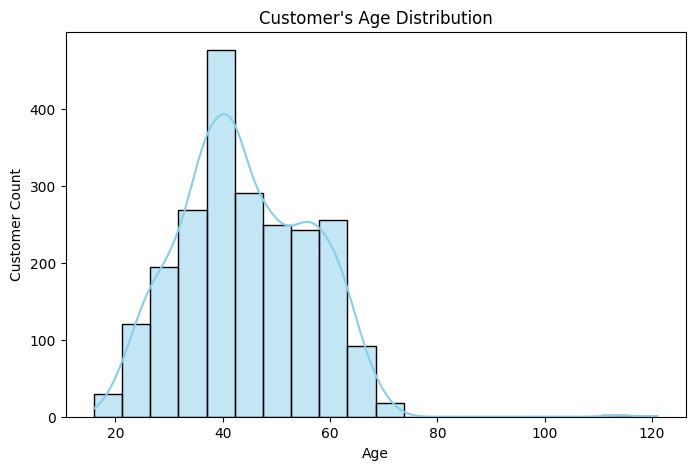

In [20]:
# Visualisasi persebaran umur tiap pelanggan
plt.figure(figsize=(8,5))
sns.histplot(eda_market_cmp['age'], bins=20, kde=True, color='skyblue')
plt.title("Customer's Age Distribution")
plt.xlabel('Age')
plt.ylabel('Customer Count')
plt.show()

In [21]:
# Menampilkan kelompok usia yang dominan (dalam rentang 10 tahun)
bins = [20, 30, 40, 50, 60, 70, 80, 90]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
eda_market_cmp['age_group'] = pd.cut(eda_market_cmp['age'], bins=bins, labels=labels, right=False)

eda_market_cmp['age_group'].value_counts()

age_group
40-49    653
30-39    591
50-59    470
60-69    262
20-29    239
70-79     12
80-89      0
Name: count, dtype: int64

<div align="justify"

Berdasarkan hasil visualisasi persebaran dan pengelompokkan umur:

1. Mayoritas pelanggan berada di rentang 30–49 tahun, dengan kelompok terbesar 40–49 tahun (653 pelanggan).

2. Sangat sedikit pelanggan yang berusia di atas 70 tahun, dan hampir tidak ada yang lebih dari 80 tahun.

3. Proporsi pelanggan muda (20–29 tahun) juga relatif kecil, hanya 239 orang.

Rekomendasi Pemasaran

- Target Utama: Fokus pada segmen usia produktif 30–49 tahun.

- Kanal Promosi: Gunakan media seperti Facebook, LinkedIn, dan YouTube yang cenderung lebih banyak diakses segmen ini.

- Jenis Produk: Tawarkan produk kelas menengah hingga premium yang sesuai dengan daya beli dan gaya hidup mereka.

- Peluang Sekunder: Buat promosi khusus atau kampanye yang lebih relevan bagi usia 20–29 tahun untuk membangun basis pelanggan jangka panjang.

<div align="justify"

**Education Level Distribution & Spending Analysis**

Tahap berikutnya adalah melihat distribusi tingkat pendidikan untuk memahami profil sosial ekonomi pelanggan. Tingkat pendidikan sering berkaitan dengan daya beli dan preferensi produk. Analisis ini juga dilengkapi dengan perbandingan pendapatan antar kelompok pendidikan menggunakan boxplot.

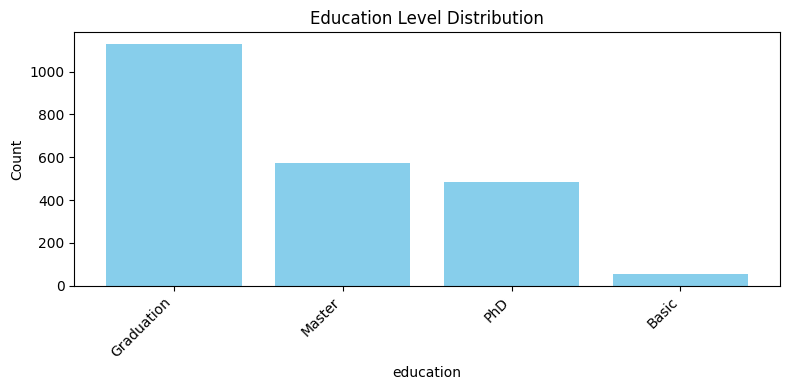

In [22]:
# Distribusi Tingkat Pendidikan (Bar Chart)
edu_counts = eda_market_cmp["education"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8,4))
plt.bar(edu_counts.index, edu_counts.values, color="skyblue")
plt.title("Education Level Distribution")
plt.xlabel("education")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

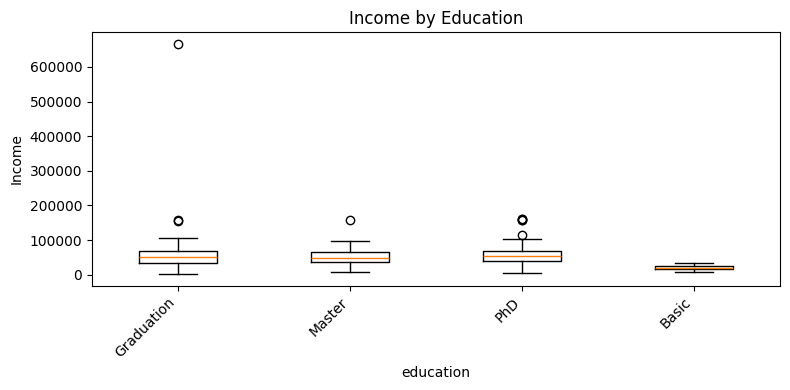

In [23]:
plt.figure(figsize=(8,4))
order = edu_counts.index.tolist()
data_income = [eda_market_cmp.loc[eda_market_cmp["education"]==lvl, "income"].dropna() for lvl in order]
plt.boxplot(data_income, tick_labels=order)
plt.title("Income by Education")
plt.xlabel("education")
plt.ylabel("Income")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

<div align="justify">

Berdasarkan hasil visualisasi persebaran pendindikan pelanggan dan boxplot income berdasarkan pendidikan pelanggan didapat bahwa:

1. Kelompok Terbesar: Pelanggan dengan pendidikan “Graduation” (lebih dari 1.100 orang), disusul Master’s (~590) dan PhD (~500).

2. Kelompok Terkecil: Pendidikan dasar (Basic) (kurang dari 100 orang).

3. Insight Pendapatan:

- Graduation memiliki rentang pendapatan paling luas, termasuk penghasilan tertinggi.

- Master’s dan PhD memiliki median pendapatan serupa, namun dengan variasi yang lebih kecil.

- Basic education memiliki pendapatan rendah secara konsisten.

Rekomendasi Pemasaran

- Potensi High-Spend: Graduation dapat menjadi target upsell premium, program loyalitas, dan bundling produk.

- Segmen Profesional: Master’s dan PhD dapat ditawari produk berkualitas tinggi dan layanan eksklusif.

- Segmen Hemat: Untuk Basic education, tawarkan paket terjangkau atau promo harga agar konversi meningkat tanpa membebani anggaran mereka.

- Strategi Cross-Selling: Sesuaikan promosi berdasarkan rentang pendapatan di setiap kategori pendidikan, bukan hanya berdasarkan tingkat pendidikan saja.

<div align="justify">

**Income & Spending Patterns by Marital Status**

Disini saya ingin melakukan eksplorasi mengenai pola konsumsi pelanggan dengan melihat hubungan antara pendapatan (`income`) dan total pengeluaran (`total_spent`) berdasarkan status pernikahan. Analisis ini kemudian diperkuat dengan perhitungan rasio pengeluaran terhadap pendapatan (`spent_ratio`) agar perbandingan antar kelompok menjadi lebih adil (tidak bias terhadap pelanggan berpendapatan tinggi atau rendah).

Pendekatan ini penting karena dua pelanggan dengan total belanja sama bisa saja memiliki tingkat konsumsi yang berbeda secara proporsional terhadap penghasilannya. Dengan membandingkan `spent_ratio`, kita bisa mengidentifikasi siapa yang benar-benar konsumtif dan siapa yang cenderung hemat, terlepas dari besar kecilnya pendapatan absolut.

Hasil analisis ini dapat dimanfaatkan untuk tujuan bisnis seperti:

1. Menyusun strategi pemasaran yang lebih tepat sasaran berdasarkan perilaku konsumsi.

2. Menentukan segmen pelanggan potensial untuk program upselling atau loyalty.

3. Mengidentifikasi kelompok yang membutuhkan pendekatan promosi berbeda agar pengeluaran mereka meningkat.

Dengan kata lain, ini bukan sekadar melihat berapa banyak pelanggan membelanjakan uangnya, tetapi seberapa besar porsi dari pendapatan yang mereka relakan untuk belanja—memberikan wawasan yang lebih tajam bagi pengambilan keputusan berbasis data.

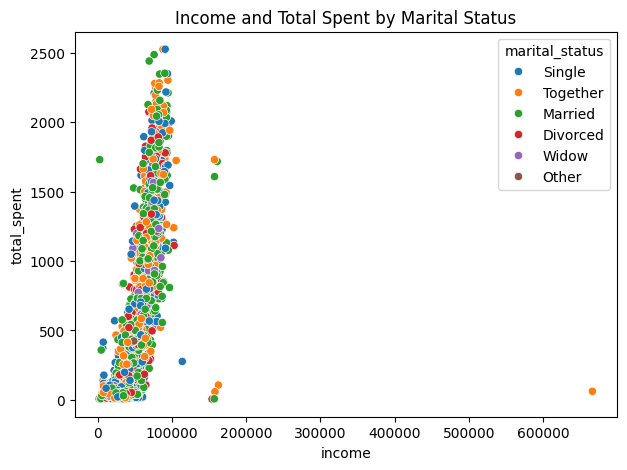

In [24]:
# Visualisasi 'income' dan 'total_spent' berdasarkan 'marital_status'
plt.figure(figsize=(7,5))
sns.scatterplot(data=eda_market_cmp, x='income', y='total_spent', hue='marital_status')
plt.title('Income and Total Spent by Marital Status')
plt.show()


<div align="justify">

Hasil visualisasi scatter plot ini memperlihatkan hubungan antara pendapatan (income) dan total pengeluaran (total_spent), dipisahkan berdasarkan status pernikahan.

Insight utama:

- Pola umum: Terlihat hubungan positif (semakin tinggi pendapatan, biasanya total pengeluaran juga meningkat).

- Kerapatan data: Sebagian besar titik data terkumpul di kisaran income di bawah 100.000, menunjukkan mayoritas pelanggan berada di kelompok pendapatan menengah-ke-bawah.

- Outlier mencolok: Ada beberapa titik ekstrem, misalnya pendapatan mencapai >600.000 tapi pengeluaran relatif rendah. Ini bisa jadi pelanggan spesial atau data anomali.

- Persebaran kategori: Status pernikahan seperti Single, Together, Married, Divorced, Widow, Other tersebar cukup merata di hampir semua tingkat pendapatan, artinya status pernikahan bukan satu-satunya faktor yang menentukan besarnya pengeluaran.

<div align="justify">

Setelah melakukan analisis hubungan antara pendapatan (`income`) dan total pengeluaran (`total_spent`) pelanggan berdasarkan status pernikahan, langkah berikutnya adalah menghitung rasio pengeluaran terhadap pendapatan (`spent_ratio`). Perhitungan ini memberikan gambaran yang lebih adil dan proporsional untuk membandingkan perilaku konsumsi antar kelompok pelanggan, karena mempertimbangkan perbedaan tingkat pendapatan masing-masing.

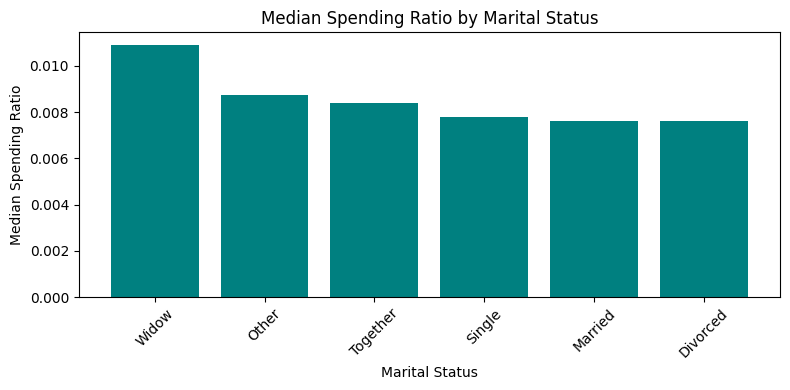

Median Spending Ratio per Marital Status:
marital_status
Widow       0.010911
Other       0.008755
Together    0.008395
Single      0.007779
Married     0.007623
Divorced    0.007616
Name: spent_ratio, dtype: float64


In [25]:
# Buat kolom Spending Ratio
eda_market_cmp["spent_ratio"] = eda_market_cmp["total_spent"] / eda_market_cmp["income"]

# Drop income NaN untuk perhitungan
ratio_stats = (
    eda_market_cmp.dropna(subset=["income"])
      .groupby("marital_status")["spent_ratio"]
      .median()
      .sort_values(ascending=False))

plt.figure(figsize=(8,4))
plt.bar(ratio_stats.index, ratio_stats.values, color="teal")
plt.title("Median Spending Ratio by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Median Spending Ratio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Median Spending Ratio per Marital Status:")
print(ratio_stats)

<div align="justify">

Dari analisis Median Spending Ratio per Marital Status, saya bisa melihat beberapa hal menarik:

1. Paling konsumtif, Kelompok `Widow` memiliki rasio pengeluaran terhadap pendapatan tertinggi, diikuti oleh `Other`. Ini berarti, secara proporsional, mereka mengalokasikan bagian pendapatan yang lebih besar untuk belanja dibanding kelompok lain.

2. Tingkat menengah, Kelompok `Together`, `Single`, `Married`, dan `Divorced` berada di kisaran menengah. Perbedaan di antara mereka relatif kecil, sehingga pola konsumsinya bisa dibilang mirip.

3. Paling hemat, Tidak ada kategori dengan rasio sangat rendah seperti pada penjelasan sebelumnya, namun `Married` dan `Divorced` menunjukkan angka yang paling kecil di antara kelompok lain, menandakan proporsi belanja terhadap pendapatan mereka lebih rendah.

Secara keseluruhan, dengan melihat pola ini dapat memberikan gambaran yang lebih akurat dibanding hanya melihat total belanja mentah, karena mempertimbangkan pendapatan masing-masing kategori.

<div align="justify">

**Most Purchased Product Category**

Saya melanjutkan ekplorasi mengenai kategori produk yang paling banyak dibeli pelanggan dengan tujuan mengidentifikasi kategori yang memberikan kontribusi penjualan terbesar. Langkah ini penting untuk mengetahui produk mana yang menjadi andalan perusahaan, sehingga strategi pemasaran, stok, dan promosi bisa difokuskan pada kategori tersebut.

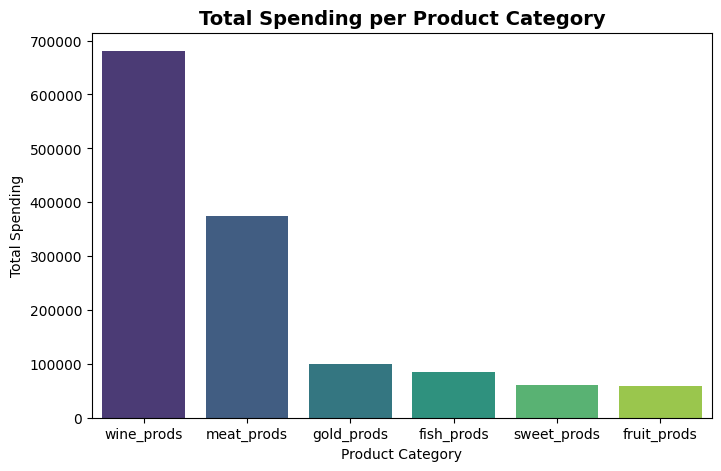

wine_prods     680816
meat_prods     373968
gold_prods      98609
fish_prods      84057
sweet_prods     60621
fruit_prods     58917
dtype: int64


In [26]:
warnings.filterwarnings("ignore", category=FutureWarning)

# Pilih kolom produk
product_cols = ['wine_prods', 'fruit_prods', 'meat_prods', 'fish_prods', 'sweet_prods', 'gold_prods']

# Hitung total pembelian per kategori
product_totals = eda_market_cmp[product_cols].sum().sort_values(ascending=False)

# Visualisasi
plt.figure(figsize=(8,5))
sns.barplot(x=product_totals.index, y=product_totals.values, palette='viridis')
plt.title("Total Spending per Product Category", fontsize=14, fontweight='bold')
plt.ylabel("Total Spending")
plt.xlabel("Product Category")
plt.show()

# Tampilkan total
print(product_totals)

<div align="justify">

Hasil eksplorasi menunjukkan bahwa kategori `wine_prods` menempati posisi teratas dengan total pengeluaran sebesar (680.816), disusul oleh `meat_prods` sebesar (373.968). Sementara itu, kategori lain seperti `gold_prods` (98.609), `fish_prods` (84.057), `sweet_prods` (60.621), dan `fruit_prods` (58.917) memiliki kontribusi yang relatif kecil.

Analisis ini mengindikasikan bahwa wine adalah produk unggulan, kemungkinan karena harga per unit yang tinggi, tingginya permintaan, atau keberhasilan strategi pemasaran yang dijalankan.

Berdasarkan hasil ini, disarankan untuk:

1. Mempertahankan dan meningkatkan promosi pada produk wine, mengingat kontribusinya yang dominan terhadap pendapatan.

2. Mengevaluasi potensi peningkatan penjualan pada kategori dengan kontribusi rendah, seperti produk buah dan manis, melalui bundling dengan kategori populer atau kampanye diskon khusus.

3. Mengoptimalkan stok dan distribusi untuk kategori wine dan meat, agar permintaan tinggi dapat terus terpenuhi tanpa hambatan supply.

<div align="justify">

### 4.2 Evaluation of Previous Marketing Campaigns

Pada tahap eksplorasi ini, saya melakukan tiga analisis utama untuk memahami pola penerimaan kampanye pemasaran sebelumnya dan hubungannya dengan respons pelanggan terhadap kampanye terakhir.

<div align="justify">

**Acceptance Rate for Each Campaign**

Pertama, saya menghitung Acceptance Rate untuk setiap kampanye sebelumnya (cmp1–cmp5). Tujuannya adalah melihat kampanye mana yang memiliki tingkat penerimaan tertinggi dan terendah. 

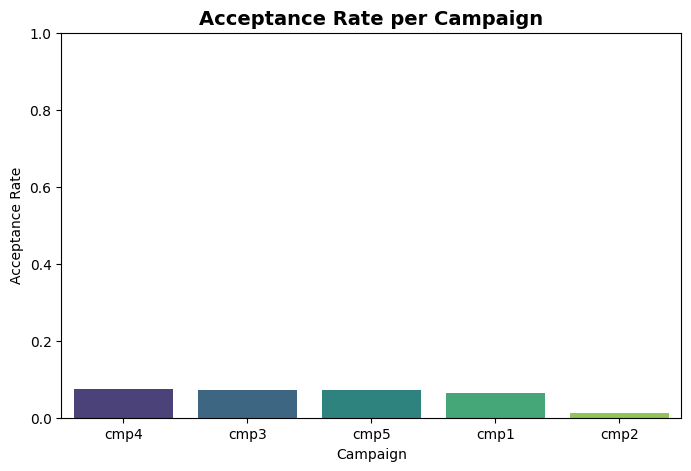

In [27]:
warnings.filterwarnings("ignore", category=FutureWarning)

# 1. Tingkat Penerimaan Tiap Kampanye
campaign_cols = ['cmp1', 'cmp2', 'cmp3', 'cmp4', 'cmp5']
acceptance_rate = eda_market_cmp[campaign_cols].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=acceptance_rate.index, y=acceptance_rate.values, palette="viridis")
plt.title("Acceptance Rate per Campaign", fontsize=14, fontweight='bold')
plt.ylabel("Acceptance Rate")
plt.xlabel("Campaign")
plt.ylim(0, 1)
plt.show()

<div align="justify">

Berdasarkan hasil visualisasi bar-chart:

1. cmp4 memiliki acceptance rate tertinggi dibanding kampanye lain, artinya proporsi pelanggan yang menerima kampanye ini paling besar.

2. cmp3 dan cmp5 memiliki tingkat penerimaan yang hampir sama dan berada di urutan menengah.

3. cmp1 sedikit di bawah mereka.

4. cmp2 memiliki acceptance rate terendah, artinya sangat sedikit pelanggan yang menerima kampanye ini dibandingkan kampanye lain.

Secara keseluruhan, bisa disimpulkan bahwa kampanye ke-4 paling efektif dalam menarik pelanggan, sedangkan kampanye ke-2 paling rendah efektivitasnya dalam hal penerimaan.

<div align="justify">

**Impact of Previous Campaign Participation on Final Campaign Response**

Selanjutnya, saya menganalisis Impact of Previous Campaign Participation on Final Campaign Response dengan membuat crosstab antara riwayat penerimaan kampanye sebelumnya dan respons di kampanye terakhir.

In [28]:
# 2. Hubungan Kampanye Sebelumnya dengan Respons Terakhir
# Asumsi: 'response' = respon kampanye terakhir (1 diterima, 0 tidak)
prev_campaigns_accept = eda_market_cmp[campaign_cols].sum(axis=1) > 0
relationship = pd.crosstab(prev_campaigns_accept, market_cmp['response'], normalize='index') * 100

print("Persentase Respons Terakhir berdasarkan Riwayat Menerima Kampanye Sebelumnya:")
print(relationship)

Persentase Respons Terakhir berdasarkan Riwayat Menerima Kampanye Sebelumnya:
response          0          1
row_0                         
False     91.783905   8.216095
True      59.395248  40.604752


<div align="justify">

Berdasarkan hasil yang didapat:

1. False (Pelanggan yang belum pernah ikut kampanye sebelumnya):

- 91.78% tidak merespons kampanye terakhir.

- 8.22% merespons positif.

2. True (Pelanggan yang pernah ikut kampanye sebelumnya):

- 59.40% tidak merespons kampanye terakhir.

- 40.60% merespons positif.

Jadi, pelanggan yang sudah pernah menerima kampanye sebelumnya memiliki kemungkinan jauh lebih tinggi (40.60%) untuk merespons positif di kampanye terakhir, dibandingkan dengan pelanggan yang belum pernah menerima kampanye sama sekali (8.22%). Analisis ini memberikan gambaran kuat bahwa pengalaman positif sebelumnya dapat meningkatkan peluang respons di masa depan.

<div align="justify">

**New Customers Who Responded Positively in the Last Campaign**

Terakhir, saya menghitung jumlah pelanggan yang belum pernah menerima kampanye sebelumnya tetapi memberikan respons positif di kampanye terakhir. 

In [29]:
# 3. Pelanggan Baru di Kampanye Terakhir
# Pelanggan baru = tidak pernah menerima kampanye sebelumnya tapi respon terakhir = 1
new_customers_last_campaign = eda_market_cmp[(market_cmp[campaign_cols].sum(axis=1) == 0) & (market_cmp['response'] == 1)]
new_customers_count = len(new_customers_last_campaign)

print(f"Jumlah pelanggan baru yang merespons positif di kampanye terakhir: {new_customers_count}")

Jumlah pelanggan baru yang merespons positif di kampanye terakhir: 146


<div align="justify">

Hasilnya, ditemukan sebanyak 146 pelanggan baru yang memberikan respons positif. Informasi ini bermanfaat untuk strategi akuisisi pelanggan baru di kampanye mendatang. Secara keseluruhan, analisis eksplorasi ini bertujuan untuk mengukur efektivitas kampanye sebelumnya, menilai pengaruh riwayat partisipasi terhadap respons terbaru, serta mengidentifikasi peluang dari pelanggan baru yang potensial.

<div align="justify">

### 4.3 Target Variable Distribution

Pada tahap ini, saya melakukan eksplorasi terhadap variabel target `response` untuk memahami distribusi kelas dalam data. Pertama, saya melakukan perhitungan jumlah dan persentase masing-masing kelas (0 = tidak merespons, 1 = merespons) untuk melihat seberapa seimbang proporsinya. Selanjutnya, hasil ini divisualisasikan dalam bentuk bar chart agar distribusi dapat diamati secara intuitif.

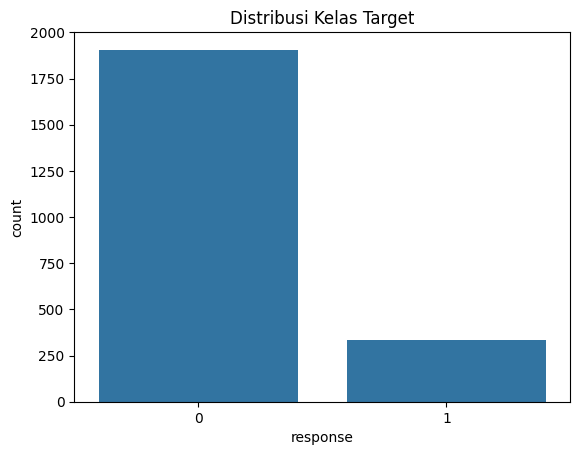

In [30]:
# Cek distribusi kelas target
eda_market_cmp['response'].value_counts()

# Cek distribusi dalam persentase
eda_market_cmp['response'].value_counts(normalize=True) * 100

# Visualisasi distribusi target
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='response', data=market_cmp)
plt.title('Distribusi Kelas Target')
plt.show()

In [31]:
# Menghitung jumlah data pada setiap kelas target
count = eda_market_cmp['response'].value_counts()

# Menghitung persentase data pada setiap kelas target
percentage = eda_market_cmp['response'].value_counts(normalize=True) * 100

# Menggabungkan jumlah dan persentase ke dalam satu DataFrame
target_dist = pd.DataFrame({
    'count': count,
    'percentage': percentage.round(2)
}).reset_index()

target_dist.columns = ['response', 'count', 'percentage']

target_dist

,response,count,percentage
0,0,1906,85.09
1,1,334,14.91


<div align="justify">

Hasil analisis menunjukkan bahwa mayoritas pelanggan (85.09%) tidak merespons kampanye terakhir, sementara hanya 14.91% yang memberikan respons positif. Visualisasi ini membantu mengidentifikasi adanya ketidakseimbangan jumlah data antar kelas. Perbandingan antara kelas 0 dan kelas 1 adalah sekitar 85:15, yang berarti jumlah data di kelas 0 hampir enam kali lipat lebih banyak dibanding kelas 1. 

Ketidakseimbangan ini berpotensi memengaruhi performa model machine learning, karena model cenderung lebih banyak mempelajari kelas mayoritas. Oleh karena itu, pada tahap pemodelan nanti, perlu dilakukan teknik penanganan imbalance seperti penggunaan algoritma yang robust terhadap imbalance dan menggunakan hyperparameter tuning.

## 5. Feature Engineer Part 2

<div align="justify">

Setelah eksplorasi, saya melanjutkan ke tahap feature engineering yang krusial untuk membersihkan, mengubah, dan memilih fitur yang paling relevan, sehingga kualitas data terjamin dan model dapat belajar secara lebih akurat serta efisien.

In [32]:
market_cmp

,id,year_birth,education,marital_status,income,kid_home,teen_home,date_customer,recency,wine_prods,...,num_web_visits,cmp1,cmp2,cmp3,cmp4,cmp5,complain,z_cost_contact,z_revenue,response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,1,0,0,0,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,0,0,1,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


### 5.1 Split Dataset

<div align="justify">

Langkah pertama, saya melakukan data splitting dengan cara:

1. Memisahkan fitur dan target: Kolom `response` sebagai variabel target (y) dengan kolom lainnya digunakan sebagai fitur (X).

2. Membagi data menjadi Train-Set dan Test-Set: Menggunakan fungsi `train_test_split` dengan proporsi 85% data untuk training dan 15% data untuk testing.

3. Stratifikasi pada target: Parameter `stratify=y` digunakan agar distribusi kelas (0 dan 1) tetap seimbang di train set maupun test set, sesuai dengan distribusi aslinya.

Hasil pembagian menunjukkan ukuran data:

1. Train-Set: Digunakan untuk melatih model agar dapat mempelajari pola dari data.

2. Test-Set: Digunakan untuk mengevaluasi performa model pada data yang belum pernah dilihat sebelumnya.

Langkah ini penting untuk memastikan model tidak hanya menghafal data training, tetapi juga memiliki kemampuan generalisasi yang baik pada data baru.

In [33]:
# Split antara fitur dan target dataset
X = market_cmp.drop('response', axis=1)
y = market_cmp['response']

# Split antara Train-Set dan Test-Set dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=46, stratify=y)

print('Train Size : ', y_train.shape)
print('Test Size  : ', y_test.shape)

Train Size :  (1904,)
Test Size  :  (336,)


<div align="justify">

Hasil dari proses data splitting menunjukkan bahwa:
1. Train set memiliki ukuran 1904 data, yang akan digunakan untuk melatih model agar dapat mempelajari pola perilaku pengguna.

2. Test set memiliki ukuran 336 data, yang akan digunakan untuk menguji performa model terhadap data yang belum pernah dilihat sebelumnya.

Proporsi ini sesuai dengan pembagian 85:15, sehingga memastikan model memiliki cukup data untuk belajar sekaligus data yang memadai untuk evaluasi. Stratifikasi yang digunakan juga memastikan distribusi target pada train set dan test set tetap konsisten dengan dataset awal.

In [34]:
# Menampilkan distribusi proporsi kelas dataset 2 setelah split dalam persen
print("Distribusi kelas di Train Set (%):\n", (y_train.value_counts(normalize=True) * 100).round(2))
print("\nDistribusi kelas di Test Set (%):\n", (y_test.value_counts(normalize=True) * 100).round(2))

Distribusi kelas di Train Set (%):
 response
0    85.08
1    14.92
Name: proportion, dtype: float64

Distribusi kelas di Test Set (%):
 response
0    85.12
1    14.88
Name: proportion, dtype: float64


<div align="justify">

Distribusi kelas pada Train-Set dan Test-Set menunjukkan hasil yang sama, yaitu:

- Kelas 0 (Negatif) sebesar 85%

- Kelas 1 (Positif) sebesar 14%

Hal ini menunjukkan bahwa proses stratifikasi berhasil menjaga proporsi distribusi target yang sama antara dataset asli, Train-Set, dan Test-Set. Dengan demikian, model akan dilatih dan diuji pada data yang memiliki distribusi target yang konsisten, sehingga evaluasi performa model menjadi lebih valid, terutama dalam konteks dataset yang mengalami class imbalance.

### 5.2 Feature Selection

<div align="justify">

#### Numeric Columns

Pada tahap feature selection, untuk kolom numerik saya terlebih dahulu memeriksa distribusi data menggunakan skewness.

<div align="center">

**Interpretasi Skewness**
| **Skewness Range**     | **Interpretation**                                          |
|------------------------|-------------------------------------------------------------|
| **`Skewness < -1`**          | Strong negative skew (long tail on the left)                |
| **`-1 ≤ Skewness < -0.5`**   | Moderate negative skew                                      |
| **`-0.5 ≤ Skewness ≤ 0.5`**  | Approximately normal                            |
| **`0.5 < Skewness ≤ 1`**     | Moderate positive skew                                      |
| **`Skewness > 1`**           | Strong positive skew (long tail on the right)               |

Referensi dari link berikut : https://www.geeksforgeeks.org/data-science/skewness-measures-and-interpretation/#magnitude-of-skewness

In [35]:
# Memilih kolom numerik untuk pengecekan skewness
skew_check_cols = ['year_birth', 'income', 'kid_home', 'teen_home', 'recency', 
                   'wine_prods', 'fruit_prods', 'meat_prods', 'fish_prods', 'sweet_prods',
                   'gold_prods', 'total_spent', 'num_deals', 'num_web', 'num_catalog', 'num_store',
                   'num_web_visits', 'z_cost_contact', 'z_revenue']

# Hitung nilai skewness
skew_values = X_train[skew_check_cols].skew()

# Fungsi interpretasi skewness
def interpret_skew(value):
    if value < -1:
        return "Highly negatively skewed"
    elif -1 <= value < -0.5:
        return "Moderately negatively skewed"
    elif -0.5 <= value <= 0.5:
        return "Approximately normal"
    elif 0.5 < value <= 1:
        return "Moderately positively skewed"
    else:
        return "Highly positively skewed"

# Membuat tabel interpretasi
skew = pd.DataFrame({
    "Skewness": skew_values.round(4),
    "Interpretation": [interpret_skew(val) for val in skew_values]
}).reset_index().rename(columns={"index": "Feature"})

# Menampilkan tabel hasil
skew


,Feature,Skewness,Interpretation
0,year_birth,-0.3841,Approximately normal
1,income,7.3390,Highly positively skewed
2,kid_home,0.6316,Moderately positively skewed
3,teen_home,0.4163,Approximately normal
4,recency,0.0114,Approximately normal
5,wine_prods,1.1762,Highly positively skewed
6,fruit_prods,2.1308,Highly positively skewed
7,meat_prods,2.1942,Highly positively skewed
8,fish_prods,1.9173,Highly positively skewed
9,sweet_prods,2.1101,Highly positively skewed


<div align="justify">

Hasilnya menunjukkan mayoritas kolom memiliki distribusi tidak normal, sehingga saya memilih menggunakan uji Mann–Whitney U dengan Rank-Biserial Correlation untuk mengukur hubungan dengan target. Alasannya, uji ini tidak mengasumsikan distribusi normal dan cocok untuk membandingkan dua grup pada variabel numerik non-parametrik, sekaligus memberi arah serta kekuatan asosiasi.

Menurut [Statistics Solutions](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/mann-whitney-u-test-2),
> **"Uji Mann-Whitney digunakan untuk membandingkan perbedaan antara dua kelompok independen pada skala kontinu atau ordinal, serta tidak memerlukan asumsi distribusi data tertentu."**

In [36]:
# Gabungkan X_train dan y_train
corr_table = pd.concat([X_train, y_train], axis=1)

# Ambil semua kolom fitur numerik dari tabel skew
num_cols = [c for c in skew["Feature"] if c in corr_table.columns and c != y_train.name]

# Melakukan uji dengan alpha 5%
alpha = 0.05
rows = []

for col in num_cols:
    g1 = corr_table.loc[y_train == 1, col].dropna()  # response = 1
    g0 = corr_table.loc[y_train == 0, col].dropna()  # response = 0
    if len(g1) < 2 or len(g0) < 2:
        rows.append({"feature": col, "association": np.nan, "p_value": np.nan,
                     "alpha": alpha, "significant": False,
                     "interpretation": "Insufficient data"})
        continue
    
    # Mann–Whitney test
    u = mannwhitneyu(g1, g0, alternative="two-sided", method="auto")
    n1, n0 = len(g1), len(g0)
    U = u.statistic
    
    # Rank-biserial correlation
    r_rb_abs = 1 - (2 * U) / (n1 * n0)
    sign = np.sign(np.median(g1) - np.median(g0))
    r_rb = float(sign * abs(r_rb_abs))
    
    sig = u.pvalue < alpha
    interp = ("Significant (Resp=1 tends to be higher)" if sig and r_rb > 0 else
              "Significant (Resp=0 tends to be higher)" if sig and r_rb < 0 else
              "Not significant (No clear monotonic difference)")
    
    rows.append({
        "feature": col,
        "rank_biserial": r_rb,
        "p_value": u.pvalue,
        "significant": sig,
        "interpretation": interp})

# Buat tabel hasil
rank_biserial_df = (pd.DataFrame(rows)
                      .assign(abs_association=lambda d: d["rank_biserial"].abs())
                      .sort_values(["significant", "abs_association"], ascending=[False, False])
                      .reset_index(drop=True))

rank_biserial_df.round({"association": 4, "p_value": 4, "alpha": 3})

,feature,rank_biserial,p_value,significant,interpretation,abs_association
0,total_spent,0.391938,0.0000,True,Significant (Resp=1 tends to be higher),0.391938
1,num_catalog,0.375802,0.0000,True,Significant (Resp=1 tends to be higher),0.375802
2,meat_prods,0.368942,0.0000,True,Significant (Resp=1 tends to be higher),0.368942
3,recency,-0.323700,0.0000,True,Significant (Resp=0 tends to be higher),0.323700
4,gold_prods,0.317297,0.0000,True,Significant (Resp=1 tends to be higher),0.317297
5,wine_prods,0.316719,0.0000,True,Significant (Resp=1 tends to be higher),0.316719
6,num_web,0.271794,0.0000,True,Significant (Resp=1 tends to be higher),0.271794
7,income,0.269184,0.0000,True,Significant (Resp=1 tends to be higher),0.269184
8,fruit_prods,0.247361,0.0000,True,Significant (Resp=1 tends to be higher),0.247361
9,sweet_prods,0.239943,0.0000,True,Significant (Resp=1 tends to be higher),0.239943


<div align="justify">

Berdasarkan tabel tersebut, sebagian besar fitur memiliki hubungan yang signifikan dengan variabel target `response`. 

1. Faktor dengan pengaruh paling kuat adalah `total_spent`, `num_catalog`, dan `meat_prods`, yang semuanya memiliki korelasi positif, artinya semakin tinggi nilainya, semakin besar kemungkinan pelanggan memberikan respon positif. 

2. Sebaliknya, `recency` memiliki korelasi negatif yang cukup kuat, menunjukkan bahwa semakin lama sejak pembelian terakhir, semakin kecil kemungkinan respon positif. 

3. Beberapa fitur seperti `num_store`, `year_birth`, `num_web_visits`, dan `z_cost_contact` tidak menunjukkan pengaruh signifikan terhadap respon, sehingga mungkin kurang bermanfaat untuk dimasukkan ke model.

Secara keseluruhan, fitur yang terkait dengan jumlah pembelian, frekuensi interaksi, dan jenis produk yang dibeli cenderung menjadi prediktor penting untuk respon pelanggan, sedangkan variabel yang tidak signifikan dapat dipertimbangkan untuk dihilangkan demi menyederhanakan model dan meningkatkan kinerjanya.

<div align="justify">

#### Category Columns

Sementara itu, untuk kolom kategori saya menggunakan Cramér’s V karena metode ini efektif mengukur kekuatan hubungan antara dua variabel kategori tanpa asumsi distribusi tertentu.

In [37]:
# Definisikan kolom kategori
encoding_cols = ['cmp1', 'cmp2', 'cmp3', 'cmp4', 'cmp5', 'complain']
object_cols   = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Gabungan kolom kategori (hapus duplikat & pastikan ada di X_train)
cat_cols = [c for c in dict.fromkeys(encoding_cols + object_cols) if c in X_train.columns]

# interpretasi Cramér's V
def interpret_cramers_v(v: float) -> str:
    if v < 0.1:
        return "Negligible"
    elif v < 0.3:
        return "Weak"
    elif v < 0.5:
        return "Moderate"
    else:
        return "Strong"

# 3) Hitung Cramér's V vs y_train
cat_results = []
alpha = 0.05

for col in cat_cols:
    # Jika hanya memiliki 1 unique (skip)
    if X_train[col].nunique(dropna=False) < 2:
        cat_results.append({
            'feature': col,
            'cramers_v': np.nan,
            'p_value': np.nan,
            'abs_v': np.nan,
            'interpretation': 'Insufficient levels',
            'significant': False})
        continue

    contingency = pd.crosstab(X_train[col], y_train)

    # jika salah satu dimensi < 2 (mis. semua target sama di level itu), skip
    if contingency.shape[0] < 2 or contingency.shape[1] < 2:
        cat_results.append({
            'feature': col,
            'cramers_v': np.nan,
            'p_value': np.nan,
            'abs_v': np.nan,
            'interpretation': 'Insufficient variation',
            'significant': False})
        continue

    chi2, p, dof, ex = chi2_contingency(contingency)
    n = contingency.values.sum()
    v = np.sqrt((chi2 / n) / (min(contingency.shape) - 1))  # Cramér's V

    cat_results.append({
        'feature': col,
        'cramers_v': v,
        'p_value': p,
        'abs_v': abs(v),
        'interpretation': interpret_cramers_v(abs(v)),
        'significant': p <= alpha})

# Tabel hasil
cat_corr_df = (pd.DataFrame(cat_results)
               .sort_values('abs_v', ascending=False)
               .reset_index(drop=True))

cat_corr_df.round(4)


,feature,cramers_v,p_value,abs_v,interpretation,significant
0,id,1.0000,0.4892,1.0000,Strong,False
1,cmp5,0.3273,0.0000,0.3273,Moderate,True
2,cmp1,0.3087,0.0000,0.3087,Moderate,True
3,cmp3,0.2799,0.0000,0.2799,Weak,True
4,cmp2,0.1629,0.0000,0.1629,Weak,True
5,cmp4,0.1601,0.0000,0.1601,Weak,True
6,marital_status,0.1494,0.0000,0.1494,Weak,True
7,education,0.1034,0.0001,0.1034,Weak,True
8,complain,0.0198,0.3879,0.0198,Negligible,False


<div align="justify">

Berdasarkan hasil kedua pengujian tersebut, saya menghapus kolom yang tidak signifikan atau memiliki informasi rendah, yaitu:

- `id`

- `num_store`

- `year_birth`

- `num_web_visits`

- `z_cost_contact`

- `z_revenue`

- `complain`

- `date_customer`

In [38]:
# Menghapus kolom dari Train-Set
train_to_drop = ['id', 'num_store', 'year_birth', 'num_web_visits', 'z_cost_contact', 'z_revenue', 'complain', 'date_customer']
X_train.drop(train_to_drop, axis=1, inplace=True)

# Menghapus kolom dari Test-Set
X_test.drop(train_to_drop, axis=1, inplace=True)

# Menampilkan Train-Set
X_train.head(10)

,education,marital_status,income,kid_home,teen_home,recency,wine_prods,fruit_prods,meat_prods,fish_prods,...,gold_prods,total_spent,num_deals,num_web,num_catalog,cmp1,cmp2,cmp3,cmp4,cmp5
521,Master,Single,73454.0,0,0,95,982,73,351,56,...,175,1651,1,2,4,0,0,1,0,0
465,PhD,Single,66582.0,0,0,83,789,25,420,16,...,0,1288,1,2,8,0,0,0,0,0
1837,Graduation,Married,47743.0,0,1,56,198,2,43,0,...,20,275,3,4,1,0,0,0,1,0
1915,Graduation,Single,57107.0,0,1,44,159,0,120,0,...,137,416,7,4,4,0,1,0,1,0
953,PhD,Single,42767.0,2,0,53,20,6,43,19,...,38,131,1,3,1,0,0,0,0,0
2049,Master,Married,81044.0,0,0,0,450,26,535,73,...,26,1208,1,5,6,0,0,0,0,0
1100,Graduation,Divorced,83829.0,0,0,78,897,161,430,186,...,27,1862,0,4,7,1,0,1,0,1
2188,Master,Together,65487.0,0,0,48,240,67,500,199,...,163,1169,3,3,5,0,0,0,0,0
1063,PhD,Divorced,35860.0,1,1,37,15,0,8,4,...,20,49,2,1,1,0,0,1,0,0
689,PhD,Together,69476.0,0,0,3,260,86,559,63,...,67,1044,1,4,6,0,0,0,0,0


### 5.3 Check Missing Values

<div align="justify">

Setelah proses feature selection selesai, langkah berikutnya adalah mengecek jumlah missing values pada Train-Set untuk mengetahui kolom mana yang memerlukan penanganan khusus. Hasil pengecekan menunjukkan kolom-kolom yang memiliki nilai kosong beserta jumlahnya. Informasi ini menjadi dasar untuk menentukan strategi handling missing value yang sesuai.

In [39]:
# Menampilkan jumlah missing values dari Train-Set
missing_train = X_train.isna().sum()

print('Jumlah missing values pada Train-Set')
print(missing_train[missing_train>0])

Jumlah missing values pada Train-Set
income    18
dtype: int64


<div align="justify">

Sebelum melakukan imputasi atau penghapusan, saya terlebih dahulu memeriksa korelasi antara kolom yang memiliki missing value dengan kolom-kolom lainnya. Tujuannya adalah untuk mengidentifikasi apakah missing value tersebut bersifat MCAR (Missing Completely at Random), MAR (Missing at Random), atau MNAR (Missing Not at Random). Dengan memahami jenis missing value yang terjadi, saya dapat menentukan metode handling yang paling tepat, misalnya menggunakan imputasi statistik, imputasi berbasis hubungan antar fitur, atau mengelompokkan nilai kosong sebagai kategori tersendiri jika bersifat informatif.

In [40]:
X_train[X_train['income'].isna()]

,education,marital_status,income,kid_home,teen_home,recency,wine_prods,fruit_prods,meat_prods,fish_prods,...,gold_prods,total_spent,num_deals,num_web,num_catalog,cmp1,cmp2,cmp3,cmp4,cmp5
319,Graduation,Single,NaN,1,2,67,738,20,172,52,...,20,1052,6,2,3,1,0,0,1,0
10,Graduation,Married,NaN,1,0,11,5,5,6,0,...,1,19,1,1,0,0,0,0,0,0
58,Graduation,Single,NaN,1,0,57,11,3,22,2,...,6,46,2,2,0,0,0,0,0,0
128,PhD,Married,NaN,0,1,23,352,0,27,10,...,15,404,3,6,1,0,0,0,0,0
48,Graduation,Single,NaN,2,1,96,48,5,48,6,...,7,124,3,2,1,0,0,0,0,0
2079,Master,Together,NaN,0,1,83,161,0,22,0,...,24,207,2,4,1,0,0,0,0,0
133,Graduation,Married,NaN,0,1,96,231,65,196,38,...,124,725,1,6,5,0,0,0,0,0
1379,Master,Together,NaN,0,1,39,187,5,65,26,...,14,317,2,4,2,0,0,0,0,0
71,Master,Married,NaN,1,0,25,25,3,43,17,...,17,109,3,3,0,0,0,0,0,0
92,Master,Together,NaN,0,0,87,445,37,359,98,...,18,985,1,2,4,0,0,0,0,0


<div align="justify">

Langkah pertama yang saya lakukan sebelum melakukan uji korelasi adalah membuat variabel indikator yang menandakan apakah baris tertentu memiliki nilai income yang hilang atau tidak. Caranya, saya menggunakan `isna()` untuk mendeteksi nilai yang hilang, lalu mengubah hasilnya menjadi bilangan biner (1 jika missing, 0 jika tidak). Variabel ini penting karena akan menjadi target sementara untuk menguji apakah hilangnya nilai `income` memiliki hubungan dengan fitur-fitur lain. Dengan indikator ini, kita bisa menguji apakah missingness tersebut bersifat acak atau memiliki pola tertentu.

Setelah indikator dibuat, saya menguji hubungan antara missingness income dengan target (y). Karena kedua variabel ini bersifat kategorikal biner, saya menggunakan uji Chi-square untuk melihat signifikansi asosiasi, Fisher Exact Test sebagai cadangan jika ada sel kecil, serta menghitung Cramér’s V untuk mengukur kekuatan hubungan (0–1) dan Phi coefficient untuk arah hubungan (+/-).

In [41]:
# Membuat salinan antara fitur dan target Train-Set
X = X_train.copy()
y = y_train.copy()
miss = X['income'].isna().astype(int)

alpha = 0.05

# Crosstab 2×2: missing_income vs response
ct_table = pd.crosstab(miss, y)  # miss = X['income'].isna().astype(int)

# --- Chi-square ---
chi2, p_chi, dof, expected = chi2_contingency(ct_table)

# --- Fisher's exact (hanya untuk 2x2) ---
if ct_table.shape == (2, 2):
    OR, p_fisher = fisher_exact(ct_table.values)
else:
    OR, p_fisher = np.nan, np.nan

# --- Cramér's V (bias-corrected; Bergsma, 2013) ---
def cramers_v_corrected(ct: pd.DataFrame):
    chi2_, p_, dof_, expected_ = chi2_contingency(ct)
    n = ct.to_numpy().sum()
    r, k = ct.shape
    phi2 = chi2_ / n
    # bias correction
    phi2_corr = max(0, phi2 - (k - 1) * (r - 1) / (n - 1))
    r_corr = r - (r - 1) ** 2 / (n - 1)
    k_corr = k - (k - 1) ** 2 / (n - 1)
    denom = min(r_corr - 1, k_corr - 1)
    v = np.sqrt(phi2_corr / denom) if denom > 0 else 0.0
    return v

# --- Phi coefficient (signed) khusus 2×2 ---
def phi_coefficient_2x2(ct: pd.DataFrame):
    if ct.shape != (2, 2):
        return np.nan
    a, b, c, d = ct.values.flatten()  # [[a,b],[c,d]]
    denom = np.sqrt((a + b) * (c + d) * (a + c) * (b + d))
    return ((a * d) - (b * c)) / denom if denom > 0 else np.nan

def interpret_strength(val: float) -> str:
    x = abs(val)
    if x < 0.10:  return "Very weak"
    if x < 0.20:  return "Weak"
    if x < 0.40:  return "Moderate"
    if x < 0.60:  return "Relatively strong"
    if x < 0.80:  return "Strong"
    return "Very strong"

V = cramers_v_corrected(ct_table)
phi = phi_coefficient_2x2(ct_table)

# Rangkuman ke DataFrame
missing_vs_response = pd.DataFrame({
    'test':                ['Chi-square'],
    'chi2':                [float(chi2)],
    'dof':                 [int(dof)],
    'p_value':             [float(p_chi)],
    'significant_alpha_0_05': [bool(p_chi < alpha)],
    'fisher_odds_ratio':   [float(OR)] if np.isfinite(OR) else [np.nan],
    'fisher_p_value':      [float(p_fisher)] if np.isfinite(p_fisher) else [np.nan],
    'fisher_significant_alpha_0_05': [bool(p_fisher < alpha)] if np.isfinite(p_fisher) else [np.nan],
    'cramers_v':           [float(V)],
    'cramers_v_interp':    [interpret_strength(V)],
    'phi':                 [float(phi)] if np.isfinite(phi) else [np.nan],
    'phi_interp':          [(("Positive - " if phi > 0 else "Negative - ") + interpret_strength(phi))
                            if np.isfinite(phi) else np.nan],
})

# Lihat ringkas
missing_vs_response.round({'chi2':4, 'p_value':4, 'fisher_p_value':4, 'cramers_v':4, 'phi':4})

,test,chi2,dof,p_value,significant_alpha_0_05,fisher_odds_ratio,fisher_p_value,fisher_significant_alpha_0_05,cramers_v,cramers_v_interp,phi,phi_interp
0,Chi-square,2.1096,1,0.1464,False,0.0,0.094,False,0.0241,Very weak,-0.0409,Negative - Very weak


<div align="justify">

Hasilnya menunjukkan hubungan yang sangat lemah dan tidak signifikan. Artinya, hilangnya nilai income tidak memiliki pola yang jelas terhadap perilaku respon pelanggan pada target variabel.

<div align="justify">

Selanjutnya, saya memeriksa apakah ada perbedaan signifikan pada distribusi fitur numerik antara data yang memiliki nilai missingness income dan yang tidak. Karena sebagian besar fitur numerik tidak berdistribusi normal, saya menggunakan Mann–Whitney U test untuk membandingkan perbedaan distribusi antara dua kelompok. Sebagai ukuran kekuatan perbedaan tersebut, saya menghitung rank-biserial correlation, yang memberikan gambaran seberapa kuat perbedaan nilai antara kedua kelompok tersebut.

In [42]:
# Menampilkan kolom numerik
numeric_cols = [
    'total_spent','wine_prods','fruit_prods','meat_prods','fish_prods',
    'sweet_prods','gold_prods','num_deals','num_web','num_catalog',
    'recency','kid_home','teen_home']

# Tabel korelasi numerik (Mann–Whitney & Rank-Biserial)
numeric_rows = []

for col in numeric_cols:
    a = X.loc[miss == 1, col].dropna()
    b = X.loc[miss == 0, col].dropna()
    if len(a) < 2 or len(b) < 2:
        numeric_rows.append({
            'feature': col,
            'rank_biserial': np.nan,
            'p_value': np.nan,
            'interpretation': "Insufficient data"
        })
        continue

    u = mannwhitneyu(a, b, alternative='two-sided', method='auto')
    n1, n0 = len(a), len(b)
    U = u.statistic

    # rank-biserial correlation
    r_rb_abs = 1 - (2 * U) / (n1 * n0)
    sign = np.sign(np.median(a) - np.median(b))  # tanda tetap dihitung
    r_rb = float(sign * abs(r_rb_abs))           # tapi tidak ditulis di interpretasi

    # interpretasi kekuatan
    ar = abs(r_rb)
    if ar >= 0.80:  strength = "Very strong"
    elif ar >= 0.60: strength = "Strong"
    elif ar >= 0.40: strength = "Moderate"
    elif ar >= 0.20: strength = "Weak"
    else: strength = "Very weak"

    signif = " - Significant" if u.pvalue < alpha else " - Not Significant"

    numeric_rows.append({
        'feature': col,
        'rank_biserial': r_rb,
        'p_value': u.pvalue,
        'interpretasi': f"{strength}{signif}"
    })

numeric_results_df = (
    pd.DataFrame(numeric_rows)
    .sort_values(['p_value', 'rank_biserial'], ascending=[True, False])
    .reset_index(drop=True)
)

numeric_results_df.round({'rank_biserial': 4, 'p_value': 4})


,feature,rank_biserial,p_value,interpretasi
0,num_catalog,-0.2544,0.0586,Weak - Not Significant
1,fruit_prods,-0.2359,0.0835,Weak - Not Significant
2,wine_prods,-0.2089,0.1267,Weak - Not Significant
3,kid_home,0.1743,0.1384,Very weak - Not Significant
4,num_web,-0.1723,0.2041,Very weak - Not Significant
5,fish_prods,-0.1593,0.2428,Very weak - Not Significant
6,teen_home,0.1382,0.2485,Very weak - Not Significant
7,recency,0.1506,0.2710,Very weak - Not Significant
8,meat_prods,-0.1394,0.3083,Very weak - Not Significant
9,total_spent,-0.1290,0.3457,Very weak - Not Significant


<div align="justify">

Hasilnya konsisten menunjukkan kekuatan hubungan yang sangat lemah hingga lemah, dengan p-value yang mayoritas di atas 0,05, sehingga dapat disimpulkan bahwa tidak ada hubungan signifikan antara kedua kelompok.

<div align="justify">

Untuk fitur kategorikal seperti `education` dan `marital_status`, saya menggunakan uji Chi-square pada tabel kontingensi 2×K, kemudian menghitung Cramér’s V untuk mengukur kekuatan hubungan.

In [43]:
# --- fungsi Cramér's V bias-corrected: return (v, chi2, p, dof) ---
def cramers_v_corrected(ct: pd.DataFrame):
    chi2, p, dof, expected = chi2_contingency(ct)
    n = ct.to_numpy().sum()
    r, k = ct.shape
    phi2 = chi2 / n
    # bias correction (Bergsma, 2013)
    phi2_corr = max(0, phi2 - (k - 1)*(r - 1)/(n - 1))
    r_corr = r - (r - 1)**2/(n - 1)
    k_corr = k - (k - 1)**2/(n - 1)
    denom = min(r_corr - 1, k_corr - 1)
    v = np.sqrt(phi2_corr / denom) if denom > 0 else 0.0
    return v, chi2, p, dof

# --- interpretasi kekuatan V ---
def interpret_v(v: float) -> str:
    if v < 0.10:  return "Very weak"
    if v < 0.20:  return "Weak"
    if v < 0.40:  return "Moderate"
    if v < 0.60:  return "Relatively strong"
    if v < 0.80:  return "Strong"
    return "Very strong"

# perhitungan untuk fitur kategori
categorical_cols = ['education', 'marital_status']
rows = []
for col in categorical_cols:
    ct = pd.crosstab(miss, X[col])   # 2×K
    v, chi2, p, dof = cramers_v_corrected(ct)
    rows.append({
        'feature': col,
        'cramers_v': v,
        'p_value': p,
        'interpretation': f"{interpret_v(v)}" + (" - Significant" if p < alpha else " - Not Significant"),
    })

cat_results_df = (
    pd.DataFrame(rows)
      .sort_values(['p_value','cramers_v'], ascending=[True, False])
      .reset_index(drop=True)
      .round({'cramers_v': 4, 'p_value': 4})
)

cat_results_df


,feature,cramers_v,p_value,interpretation
0,marital_status,0.0325,0.2194,Very weak - Not Significant
1,education,0.0000,0.8096,Very weak - Not Significant


<div align="Justify">

Hasil pengujian menunjukkan nilai Cramér’s V yang sangat rendah (mendekati 0) dan p-value yang tinggi, sehingga dapat disimpulkan tidak ada hubungan signifikan antara kategori-kategori tersebut dengan hilangnya nilai income.

<div align="Justify">

Berdasarkan hasil analisis, pola missing pada kolom income secara statistik cenderung mengarah ke MCAR (Missing Completely At Random) karena tidak ditemukan hubungan signifikan dengan variabel target maupun sebagian besar fitur lainnya. Namun, dari sudut pandang domain bisnis, ada indikasi bahwa sebagian kasus dapat bersifat MNAR (Missing Not At Random). Misalnya, pelanggan dengan pendapatan tertentu memilih untuk tidak mengisi informasi tersebut.

Pada tahap ini, variabel indikator `missing_income` hanya digunakan sementara untuk analisis pola hilangnya data. Setelah tipe missing value teridentifikasi, variabel ini tidak akan digunakan dalam proses modeling.

Setelah mengetahui bahwa pola missing kemungkinan merupakan kombinasi `MCAR–MNAR`, saya dapat menentukan metode handling missing values-nya. Untuk meminimalkan potensi bias dan mempertahankan akurasi informasi, saya memilih menggunakan imputasi dinamis (`KNN Imputer`). Metode ini memanfaatkan hubungan antarvariabel lain di dataset untuk memperkirakan nilai income yang hilang, sehingga diharapkan memberikan estimasi yang lebih representatif dibanding metode imputasi sederhana seperti mean atau median.

Menurut [SMZ Memon et al. (2023)](https://www.sciencedirect.com/science/article/pii/S2352914823002289),
> “*KNN imputation is not affected by missing mechanism; it can be used when data is MCAR, MAR or MNAR.*”

<div align="Justify">

#### Handling Missing Values

Setelah itu, saya melakukan handling missing value pada kolom `income` menggunakan `KNN Imputer` dengan jarak berbobot (distance weighted) dan mempertimbangkan seluruh fitur numerik sebagai prediktor. Proses fit dilakukan hanya pada Train-Set, kemudian model imputasi tersebut digunakan untuk mentransformasi Test-Set, sehingga informasi dari data uji tidak ikut mempengaruhi proses training dan dapat menghindari data leakage.

In [44]:
# Pilih kolom yang akan dipakai untuk estimasi `income``
fit_cols = X_train.select_dtypes(include=[np.number]).columns.drop('income')

# Pastikan Test-Set punya kolom yang sama
missing_in_test = [c for c in fit_cols if c not in X_test.columns]
if missing_in_test:
    raise ValueError(f"Kolom berikut tidak ada di X_test: {missing_in_test}")

# Buat salinan data numerik
Xtr_num = X_train[['income'] + list(fit_cols)]
Xte_num = X_test[['income']  + list(fit_cols)]

# Inisialisasi KNN Imputer
imputer = KNNImputer(n_neighbors=5, weights='distance')

# Fit-transform data numerik
Xtr_imp = imputer.fit_transform(Xtr_num)
Xte_imp = imputer.transform(Xte_num) 

# Masukkan kembali hasil imputasi ke dataset asli
X_train.loc[:, 'income'] = Xtr_imp[:, 0]
X_test.loc[:,  'income'] = Xte_imp[:, 0]

# Menampilkan missing values setelah imputasi median
print("Missing values 'income' Train-Set setelah imputasi", X_train['income'].isna().sum())
print("Missing values 'income' Test-Set setelah imputasi", X_test['income'].isna().sum())

Missing values 'income' Train-Set setelah imputasi 0
Missing values 'income' Test-Set setelah imputasi 0


### 5.3 Split Between Numeric Columns and Category Columns Dataset

<div align="justify"

Setelah proses handling missing value selesai, saya melanjutkan ke tahap pengelompokan fitur berdasarkan jenis datanya untuk mempermudah proses feature engineering dan preprocessing selanjutnya. Pada tahap ini, kolom-kolom dibagi menjadi empat kategori utama:

1. Kolom numerik (num_pipe) → berisi fitur dengan tipe data numerik kontinu yang dapat diolah dengan teknik scaling atau transformasi, yaitu:

- `kid_home`

- `teen_home`

- `recency`

- `wine_prods`

- `fruit_prods`

- `meat_prods`

- `fish_prods`

- `sweet_prods`

- `gold_prods`

- `total_spent`

- `num_deals`

- `num_web`

- `num_catalog`

2. Kolom kategorikal ordinal (ord_pipe) → berisi fitur kategorikal yang nantinya akan di-encode menggunakan `OrdinalEncoder`, yaitu:

- `education`

3. Kolom kategorikal nominal (nom_pipe) → berisi fitur kategorikal yang nantinya akan di-encode menggunakan `OneHotEncoder`, yaitu:

- `marital_status`

4. Kolom yang dikecualikan (exc_pipe) → merupakan kolom kategorikal yang sudah di-encode atau bersifat biner sehingga tidak memerlukan encoding ulang, yaitu:

- `cmp1`

- `cmp2`

- `cmp3`

- `cmp4`

- `cmp5`

Dengan pengelompokan ini, proses preprocessing selanjutnya dapat dijalankan lebih terstruktur, misalnya saat membuat pipeline untuk scaling, encoding, maupun feature transformation.

In [45]:
# Mengkategorikan setiap kolom numerik menjadi satu tabel
num_pipe = ['kid_home', 'teen_home', 'recency', 'wine_prods', 'fruit_prods', 'meat_prods', 'fish_prods', 'sweet_prods', 'gold_prods', 'total_spent', 'num_deals', 'num_web', 'num_catalog']

# Mengkategorikan setiap kolom kategorik menjadi satu tabel
ord_pipe = ['education']
nom_pipe = ['marital_status']

# Mengkategorikan setiap kolom kategorik yang telah di-encoding
exc_pipe = ['cmp1', 'cmp2', 'cmp3', 'cmp4', 'cmp5']

# Menampilkan nama-nama kolom
print(f'numerikal: {num_pipe}')
print(f'kategorikal ordinal: {ord_pipe}')
print(f'kategorikal nominal: {nom_pipe}')
print(f'exclude: {exc_pipe}')

numerikal: ['kid_home', 'teen_home', 'recency', 'wine_prods', 'fruit_prods', 'meat_prods', 'fish_prods', 'sweet_prods', 'gold_prods', 'total_spent', 'num_deals', 'num_web', 'num_catalog']
kategorikal ordinal: ['education']
kategorikal nominal: ['marital_status']
exclude: ['cmp1', 'cmp2', 'cmp3', 'cmp4', 'cmp5']


<div align="justify"

Dibawah ini saya gunakan kolom numerik untuk ke tahap pengecekan outlier.

In [46]:
# Fitur numerikal
X_train_num = X_train[num_pipe]

### 5.4 Check Outliers

<div align="justify"

Kemudian, saya melakukan pengecekan outlier untuk setiap fitur numerik. Karena dari hasil `Cardinality Check` telah diketahui bahwa mayoritas kolom numerik memiliki distribusi yang tidak normal (skewed), sehingga pengecekan outlier dilakukan dengan menggunakan metode Tukey’s Rule (IQR) untuk menentukan batas atas dan batas bawah, kemudian menghitung persentase data yang berada di luar batas tersebut.

In [47]:
# Membuat fungsi untuk menghitung batas atas, bawah, dan total persentase outlier
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    total = len(df)

    outlier_total = ((df[variable] > upper_boundary) | (df[variable] < lower_boundary)).sum()
    outlier_percentage = (outlier_total / total) * 100

    return {
        'upper_bound': upper_boundary,
        'lower_bound': lower_boundary,
        'outlier_percentage': round(outlier_percentage, 2)}

# Looping setiap kolom untuk menghitung outlier dengan metode IQR
boundaries = {
    col: find_skewed_boundaries(X_train_num, col, 1.5)
    for col in X_train_num.columns}

# Membuat table batas outlier dan persentase outlier
boundaries_iqr = pd.DataFrame.from_dict(boundaries, orient='index')

# Menampilkan table batas outlier dan persentase outlier
boundaries_iqr

,upper_bound,lower_bound,outlier_percentage
kid_home,2.500,-1.500,0.00
teen_home,2.500,-1.500,0.00
recency,146.500,-49.500,0.00
wine_prods,1235.500,-704.500,1.58
fruit_prods,78.500,-45.500,10.82
meat_prods,541.375,-299.625,8.09
fish_prods,120.500,-67.500,9.98
sweet_prods,81.000,-47.000,10.87
gold_prods,121.500,-58.500,10.08
total_spent,2500.750,-1393.250,0.16


<div align="justify"

Dari hasil pengecekan outlier menggunakan metode Tukey’s Rule (IQR), diperoleh nilai upper bound dan lower bound beserta persentase outlier pada setiap kolom numerik. Selanjutnya, saya membandingkan batas tersebut dengan nilai maksimum dan minimum pada masing-masing kolom.

In [48]:
# Menampilkan nilai min dan max untuk kolom numerik
stats_num = X_train_num.describe().T

stats_num[['max','min']]

,max,min
kid_home,2.0,0.0
teen_home,2.0,0.0
recency,99.0,0.0
wine_prods,1493.0,0.0
fruit_prods,199.0,0.0
meat_prods,1725.0,0.0
fish_prods,259.0,0.0
sweet_prods,263.0,0.0
gold_prods,362.0,0.0
total_spent,2525.0,5.0


<div align="justify"

Hasil perbandingan tersebut menunjukkan bahwa terdapat beberapa fitur seperti `fruit_prods`, `meat_prods`, `fish_prods`, `sweet_prods` dan `gold_prods` yang memiliki persentase outlier berkisar antara 8–11%. Namun, jika dilihat dari konteks bisnis FMCG, nilai-nilai tersebut masih tergolong wajar. Hal ini karena adanya segmen pelanggan yang memang memiliki pola konsumsi jauh di atas rata-rata, seperti pelanggan premium, atau pembeli besar untuk kebutuhan event tertentu. Outlier dalam konteks ini bukan “musuh” yang harus di-handling, melainkan representasi nyata dari perilaku pelanggan.

Menghapus atau membatasi nilai tersebut justru berpotensi menghilangkan informasi penting yang relevan dengan tujuan proyek ini, yaitu memprediksi respon pelanggan terhadap kampanye pemasaran. Segmen pelanggan dengan pengeluaran tinggi atau perilaku pembelian unik dapat menjadi target bernilai tinggi bagi tim marketing. Jika data mereka dihapus atau diubah, model berisiko kehilangan kemampuan untuk mengenali pola pada segmen premium ini, yang pada akhirnya dapat menurunkan akurasi prediksi.Oleh karena itu, saya memutuskan untuk tidak melakukan handling outlier. 

Keputusan ini selaras dengan objektif bisnis, karena:

- Outlier merepresentasikan segmen pelanggan dengan potensi profit tinggi.

- Menghapusnya dapat mengurangi kemampuan model membedakan pelanggan potensial.

- Keragaman perilaku pelanggan, termasuk yang jauh di luar rata-rata, justru penting untuk membangun model yang mampu menangkap berbagai pola pembelian.

Dengan mempertahankan data ini, model klasifikasi diharapkan dapat belajar dari seluruh variasi perilaku pelanggan, sehingga prediksi respon menjadi lebih akurat dan strategi pemasaran dapat dijalankan lebih efektif.

<div align="justify">

### 5.5 Feature Scaling

Oleh karena itu, pada tahap feature scaling saya memilih menggunakan `RobustScaler`. Alasan utama pemilihan ini adalah karena `RobustScaler` menggunakan median dan interquartile range (IQR) dalam proses scaling, sehingga lebih tahan terhadap pengaruh outlier dibandingkan scaler lain seperti `StandardScaler` atau `MinMaxScaler`. Dengan menggunakan `RobustScaler` memastikan bahwa distribusi fitur numerik seperti `fruit_prods`, `meat_prods`, `fish_prods`, `sweet_prods` dan `gold_prods`, yang memiliki outlier ekstrem namun masih relevan secara bisnis, tidak akan terlalu terdistorsi. Dengan demikian, model dapat belajar lebih efektif tanpa dipengaruhi secara berlebihan oleh nilai ekstrem yang ada pada dataset.

Referensi: [Scikit-learn Documentation - Robust Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)

In [49]:
# Membuat objek scaler
scaler = RobustScaler()

<div align="justify">

### 5.6 Feature Encoding

Pada tahap Feature Encoding, dilakukan proses pengubahan data kategorikal menjadi representasi numerik agar bisa digunakan oleh model machine learning. Ada dua jenis encoder yang digunakan:

- **`OrdinalEncoder`, dalam kasus ini, kolom education termasuk kategori ordinal karena memiliki hierarki tingkat pendidikan (Basic < Graduation < Master < PhD).**

    Dalam konteks Ordinal Encoding, posisi ini penting supaya nilai numerik yang diberikan mencerminkan jenjang pendidikan dari rendah ke tinggi, yaitu:

    - Basic, pendidikan dasar (SD/SMP), umumnya prasyarat paling minimal.

    - Graduation, pendidikan menengah atas atau setara sarjana muda.

    - Master, jenjang pascasarjana tingkat awal.

    - PhD, pendidikan tertinggi dengan fokus pada riset.

    Referensi: [Scikit-learn OrdinalEncoder](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features)

- **`OneHotEncoder`, Encoder ini membuat kolom biner terpisah untuk setiap kategori sehingga tidak mengasumsikan adanya hubungan peringkat di antaranya.**

Dengan pemilihan encoder yang sesuai tipe datanya, model dapat memanfaatkan informasi kategori secara optimal tanpa distorsi akibat pengkodean yang salah.

In [50]:
# Membuat objek encoder ordinal
enco_ord = OrdinalEncoder(categories=[['Basic', 'Graduation', 'Master', 'PhD']])

# Membuat objek encoder nominal
enc_nom = OneHotEncoder()

<div align="justify">

### 5.7 Compile in Pipeline

Setelah membuat objek scaler dan encoder, saya kemudian menggabungkan seluruh langkas preprocess ke dalam ColumnTransformer. Pada tahap ini, kolom numerik akan melalui proses scaling menggunakan `RobustScaler`, sedangkan kolom kategorikal menggunakan `OrdinalEncoder` untuk ordinal dan `OneHotEncoder` untuk nominal. Selain itu, kolom exclude yang diproses dengan metode `passthrough` karena sudah dalam bentuk numerik hasil encoding (0 dan 1) sehingga tidak memerlukan transformasi tambahan. Penggunaan `ColumnTransformer` ini bertujuan untuk menggabungkan berbagai jenis preprocessing dalam satu pipeline yang efisien dan terstruktur, sehingga setiap tipe fitur diproses sesuai kebutuhannya secara otomatis sebelum masuk ke tahap modeling.

In [51]:
preprocess = ColumnTransformer([
    ('numerical', scaler, num_pipe),
    ('categorical ordinal', enco_ord, ord_pipe),
    ('categorical nominal', enc_nom, nom_pipe),
    ('exclude', 'passthrough', exc_pipe)])

preprocess

,transformers,"[('numerical', ...), ('categorical ordinal', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,with_centering,True
,with_scaling,True
,quantile_range,"(25.0, ...)"


In [52]:
preprocess.fit(X_train)

,transformers,"[('numerical', ...), ('categorical ordinal', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,with_centering,True
,with_scaling,True
,quantile_range,"(25.0, ...)"


In [53]:
preprocess.transform(X_train)

array([[ 0.        ,  0.        ,  0.93877551, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.69387755, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.14285714, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.        ,  1.        ,  0.20408163, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.        , -0.57142857, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.63265306, ...,  0.        ,
         0.        ,  0.        ]], shape=(1904, 25))

<div align="justify">

## 6. Model Definition

Setelah tahap preprocessing selesai, saya membangun pipeline model untuk memudahkan proses training dan menjaga konsistensi transformasi data. Masing-masing pipeline menggabungkan langkah feature engineering/preprocess (fe) dengan algoritma klasifikasi yang berbeda.

1. **Pipeline K-Nearest Neighbors (knn)**

    `KNeighborsClassifier` memprediksi label berdasarkan kemiripan antar pelanggan (tetangga terdekat). Cocok untuk pola non-linear dan memanfaatkan hubungan antarf fitur perilaku belanja.

2. **Pipeline Support Vector Classifier (svc)**

    `SVC(random_state=46)` mencari hyperplane pemisah terbaik; efektif ketika batas kelas kompleks dan tidak linear.

3. **Pipeline Decision Tree (dtree)**

   `DecisionTreeClassifier(random_state=46)` membentuk aturan keputusan yang mudah diinterpretasikan dan mampu menangkap interaksi fitur sederhana.

4. **Pipeline Random Forest (rforest)**

    `RandomForestClassifier(random_state=46)` mengombinasikan banyak decision tree untuk mengurangi overfitting dan menangkap interaksi fitur yang lebih kompleks; kuat untuk data perilaku pelanggan yang variatif.

5. **Pipeline Gradient Boosting (gboost)**

    `GradientBoostingClassifier(random_state=46`) membangun model secara bertahap untuk memperbaiki kesalahan sebelumnya; sering memberi performa tinggi pada masalah klasifikasi pemasaran.

In [54]:
# KNN
knn = Pipeline([('fe', preprocess),
                    ('knn', KNeighborsClassifier())])

# SVC
svc = Pipeline([('fe', preprocess),
                  ('svm', SVC(random_state=46))])

# Decision Tree
dtree = Pipeline([('fe', preprocess),
                  ('dtree', DecisionTreeClassifier(random_state=46))])

# Random Forest
rforest = Pipeline([('fe', preprocess),
                  ('rforest', RandomForestClassifier(random_state=46))])

# Gradient Boosting
gboost = Pipeline([('fe', preprocess),
                  ('gb', GradientBoostingClassifier(random_state=46))])

<div align="justify">

Kelima model dijalankan dalam konfigurasi baseline (parameter default) tanpa penyesuaian apa pun, kecuali `random_state=46` pada model agar dapat menjamin reprodusibilitas hasil dan menjaga konsistensi perbandingan antarmodel pada split data yang sama.

<div align="justify">

### Cross-Validation

Cross-validation adalah metode evaluasi model dengan cara membagi dataset menjadi beberapa subset (fold), kemudian melatih model pada sebagian data (train set) dan mengujinya pada sisa data (validation set) secara bergantian.

- Dalam kasus ini digunakan Stratified K-Fold dengan 5 pembagian, yang menjaga proporsi kelas tetap sama di setiap fold.

- Tujuannya adalah mengukur performa model secara lebih andal, meminimalkan bias akibat pembagian data yang kebetulan menguntungkan atau merugikan model, dan memastikan model bisa generalisasi dengan baik pada data inference.

Berdasarkan prinsip tersebut, saya menerapkan Stratified K-Fold Cross-Validation dengan 5 pembagian pada dataset ini. Strategi stratifikasi dipilih untuk menjaga proporsi kelas tetap konsisten di setiap fold, sehingga evaluasi akan lebih baik pada data yang imbalanced.

Dalam evaluasi ini, saya memfokuskan metrik pada F1-Score binary (kelas positif = Response=1) dan ROC-AUC. Pemilihan F1 binary didasarkan pada tujuan bisnis dalam domain marketing, yaitu menemukan pelanggan yang berpotensi merespons kampanye. Metrik ini juga robust terhadap ketidakseimbangan data serta mampu menyeimbangkan Precision (mengurangi salah target) dan Recall (menangkap sebanyak mungkin calon responden).

Tahapan ini dilakukan untuk mengevaluasi seluruh pipeline model secara menyeluruh pada Train-Set, menilai kestabilan performa, dan memilih model yang paling menjanjikan sebelum dilakukan hyperparameter tuning lebih lanjut.

In [55]:
# Scorer: F1 binary (fokus ke kelas Response=1)
f1_binary = make_scorer(f1_score, average='binary', pos_label=1)

# Kumpulan model
models = {
    "KNN": knn,
    "SVM": svc,               
    "DecisionTree": dtree,
    "RandomForest": rforest,
    "GradientBoosting": gboost}

# CV setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=46)

# Loop cross-val
rows = []
for name, pipe in models.items():
    scores = cross_val_score(pipe, X_train, y_train,
                             cv=skf, scoring=f1_binary, n_jobs=2)
    rows.append({
        "model": name,
        "mean_f1": scores.mean(),
        "std_f1": scores.std(),
        "scores": scores
    })

# Hasil
cv_df = (pd.DataFrame(rows)
           .sort_values("mean_f1", ascending=False)
           .reset_index(drop=True))

cv_df[["model","mean_f1","std_f1"]].round(4)


,model,mean_f1,std_f1
0,GradientBoosting,0.4937,0.0354
1,RandomForest,0.4631,0.0512
2,DecisionTree,0.4283,0.0430
3,SVM,0.2813,0.0932
4,KNN,0.2593,0.0626


<div align="justify">

Hasil Cross-Validation Baseline:

1. Gradient Boosting: mean F1 = 0.4937, std = 0.0354

2. Random Forest: mean F1 = 0.4631, std = 0.0512

3. Decision Tree: mean F1 = 0.4283, std = 0.0430

4. SVM: mean F1 = 0.2813, std = 0.0932

5. KNN: mean F1 = 0.2593, std = 0.0626

Hasil ini menunjukkan bahwa Gradient Boosting dan Random Forest memiliki F1-score tertinggi dibandingkan semua model lain, sekaligus memiliki standar deviasi yang relatif rendah, menandakan konsistensi performa yang baik di berbagai fold cross-validation.

<div align="justify">

**Reasons for Choosing Gradient Boosting over Random Forest**

**Random Forest**:

- Merupakan algoritma bagging (Bootstrap Aggregating).

- Membangun banyak struktur cabang secara paralel pada subset data acak, lalu menggabungkan prediksinya melalui voting (klasifikasi) atau rata-rata (regresi).

- Setiap pohon independen dan tidak saling mempengaruhi. Tujuannya mengurangi varians dan menghindari overfitting.

**Gradient Boosting**:

- Merupakan algoritma boosting, membangun pohon secara sekuensial, di mana setiap pohon baru berusaha memperbaiki kesalahan dari model sebelumnya.

- Menggunakan pendekatan gradient descent untuk meminimalkan fungsi loss.

- Cenderung memiliki bias yang lebih rendah dibanding Random Forest, namun lebih sensitif terhadap parameter tuning dan risiko overfitting jika tidak diatur dengan baik.

Dari sini, Gradient Boosting dipilih sebagai model utama karena:

1. Performa F1-score Tertinggi

    Model ini menghasilkan F1-score tertinggi di antara semua kandidat, unggul sekitar 0.0306 poin dibandingkan Random Forest. Mengingat objektif analisis ini adalah memaksimalkan kemampuan model dalam mendeteksi kelas positif (Response=1), perbedaan ini cukup signifikan karena langsung berdampak pada kualitas prediksi terhadap target yang kita prioritaskan.

2. Stabilitas Performa Lebih Baik

    Gradient Boosting memiliki standar deviasi hasil cross-validation yang lebih rendah dibandingkan Random Forest, menandakan performa yang lebih konsisten di berbagai subset data. Hal ini penting untuk dataset ini karena distribusi target yang tidak seimbang dapat membuat model menjadi overfitted di subset tertentu.

3. Kemampuan Menangkap Pola Kompleks

    Dataset ini memuat beragam fitur numerik dan kategorikal, termasuk variabel yang sebelumnya memiliki outlier serta hubungan non-linear. Gradient Boosting membangun pohon secara sekuensial, di mana setiap pohon baru berfokus memperbaiki kesalahan pohon sebelumnya. Pendekatan ini memungkinkan model untuk mempelajari interaksi kompleks antar fitur, yang relevan dengan pola respon pelanggan yang tidak selalu linier.

## 7. Modeling

### 7.1 Gradient Boosting (Baseline) Training

<div align="justify">

Setelah menentukan model yang akan digunakan, pada tahap ini saya melakukan training menggunakan model baseline Gradient Boosting. 

In [56]:
gboost.fit(X_train, y_train)

,steps,"[('fe', ...), ('gb', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numerical', ...), ('categorical ordinal', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


#### Gradient Boosting (Baseline) Evaluation

In [57]:
# Prediksi model
y_pred_train = gboost.predict(X_train)
y_pred_test = gboost.predict(X_test)
y_proba = gboost.predict_proba(X_test)[:, 1]

<Figure size 600x400 with 0 Axes>

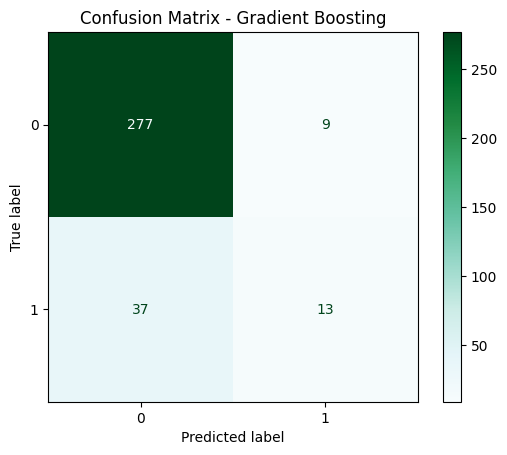

In [58]:
cm_train = confusion_matrix(y_test, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
plt.figure(figsize=(6, 4))
disp.plot(cmap='BuGn', values_format='d')
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

<div align="justify">

Berdasarkan confusion matrix untuk model baseline Gradient Boosting ini, hasil prediksinya menunjukkan bahwa:

1. True Negative (TN) = 277

    Model berhasil memprediksi 277 data kelas 0 (tidak merespon) dengan benar.

2. False Positive (FP) = 9

    Ada 9 data yang sebenarnya kelas 0, tapi model salah memprediksi sebagai kelas 1 (merespon).

3. False Negative (FN) = 37

    Ada 37 data yang sebenarnya kelas 1, tetapi diprediksi sebagai kelas 0.

4. True Positive (TP) = 13

    Model berhasil memprediksi 13 data kelas 1 dengan benar.

Model sangat baik dalam mengenali kelas 0 (TN tinggi, FP rendah), namun masih kesulitan mengenali kelas 1 karena nilai TP yang kecil dan FN yang cukup besar. Artinya, banyak pelanggan yang sebenarnya merespon kampanye tetapi tidak terdeteksi oleh model. Pola ini sering terjadi ketika dataset tidak seimbang (imbalanced data), di mana kelas mayoritas (kelas 0) lebih mudah dikenali dibandingkan kelas minoritas (kelas 1).

In [59]:
# F1 Score Report
f1_train = f1_score(y_train, y_pred_train, average='binary', zero_division=0)
f1_test = f1_score(y_test,  y_pred_test,  average='binary', zero_division=0)

print(f"F1 Gradient Boosting (Baseline) Train-Set: {f1_train:.4f}")
print(f"F1 Gradient Boosting (Baseline) Test-Set : {f1_test:.4f}")

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"\nGradient Boosting ROC-AUC Score: {roc_auc:.4f}")

# Interpretasi ROC-AUC
def interpret_roc_auc(score):
    if score > 0.9:
        return "Good"
    elif 0.8 <= score <= 0.9:
        return "Fair"
    elif 0.7 <= score < 0.8:
        return "Decent"
    elif 0.6 <= score < 0.7:
        return "Not Great"
    else:
        return "Poor"

print("Gradient Boosting (Baseline) ROC-AUC Performance:", interpret_roc_auc(roc_auc))

F1 Gradient Boosting (Baseline) Train-Set: 0.7261
F1 Gradient Boosting (Baseline) Test-Set : 0.3611

Gradient Boosting ROC-AUC Score: 0.8303
Gradient Boosting (Baseline) ROC-AUC Performance: Fair


<div align="justify">

Berdasarkan hasil evaluasi model baseline Gradient Boosting ini:

- **F1 Score Train = 0.7261**

    Artinya model cukup baik dalam menyeimbangkan precision dan recall pada data train.

- **F1 Score Test = 0.3611**

    Terjadi penurunan signifikan dibanding data train, yang menunjukkan indikasi overfitting — model terlalu menyesuaikan diri pada data train sehingga performanya menurun saat dihadapkan pada data baru.

- **ROC-AUC Score = 0.8303**

    Nilai ini berada pada kategori Fair sesuai fungsi interpretasi yang digunakan. Artinya, kemampuan model dalam membedakan antara kelas positif dan negatif tergolong cukup baik, walaupun masih ada ruang perbaikan terutama di kelas minoritas.

Model baseline ini cukup baik dalam mempelajari pola di data train, tetapi kurang generalisasi di data uji. Dengan F1 test yang rendah dan perbedaan besar antara train dan test, sehingga perlu dilakukannya hyperparameter tuning.

### 7.2 Gradient Boosting (Hyperparameter Tuning) Training

<div align="justify">

Setelah melihat hasil evaluasi baseline modelnya, saya melakukan hyperparameter tuning pada model Gradient Boosting untuk mencari kombinasi parameter terbaik yang dapat meningkatkan performa model.

Saya mendefinisikan grid parameter (gb_param) yang mencakup beberapa parameter sebagai berikut:

1. `gb__n_estimators`: jumlah pohon dalam ensemble, saya uji di nilai 200, 300, dan 500.

2. `gb__learning_rate`: laju pembelajaran, diuji di 0.03, 0.05, dan 0.1.

3. `gb__max_depth`: kedalaman maksimum pohon, diuji di 2, 3, dan 4.

4. `gb__subsample`: proporsi sampel yang digunakan tiap pohon, diuji di 0.7, 0.85, dan 1.0.

5. `gb__min_samples_leaf`: jumlah minimum sampel di daun pohon, diuji di 1, 5, dan 10.

6. `gb__max_features`: jumlah fitur yang dipertimbangkan saat split, diuji di None, 'sqrt', dan 'log2'.

In [60]:
# Hyperparameter Grid untuk Gradient Boosting
gb_param = {
    'gb__n_estimators': [200, 300, 500],
    'gb__learning_rate': [0.03, 0.05, 0.1],
    'gb__max_depth': [2, 3, 4],
    'gb__subsample': [0.7, 0.85, 1.0],
    'gb__min_samples_leaf': [1, 5, 10],
    'gb__max_features': [None, 'sqrt', 'log2'],
}

<div align="justify">

Untuk proses tuning, saya menggunakan `GridSearchCV` dengan:

- Scoring: `f1_score` dengan fokus pada kelas positif (pos_label=1) supaya model lebih optimal dalam mendeteksi kelas minoritas.

- Cross-validation: `StratifiedKFold` dengan 5 fold untuk menjaga distribusi kelas di setiap split.

- `n_jobs=2` untuk menjalankan proses secara paralel dan mempercepat eksekusi.

Proses ini mencoba seluruh kombinasi parameter di grid yang sudah saya tentukan, kemudian memilih kombinasi yang memberikan skor F1 terbaik pada data validasi.

In [61]:
f1_binary = make_scorer(f1_score, average='binary', pos_label=1)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=46)

# Grid Search
grid = GridSearchCV(gboost, gb_param,
                          scoring = f1_binary,
                          n_jobs= 2,
                          cv = skf)

grid.fit(X_train, y_train)

,estimator,Pipeline(step...m_state=46))])
,param_grid,"{'gb__learning_rate': [0.03, 0.05, ...], 'gb__max_depth': [2, 3, ...], 'gb__max_features': [None, 'sqrt', ...], 'gb__min_samples_leaf': [1, 5, ...], ...}"
,scoring,"make_scorer(f..., pos_label=1)"
,n_jobs,2
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('numerical', ...), ('categorical ordinal', ...), ...]"


In [62]:
grid_result_df = pd.DataFrame(grid.cv_results_)
grid_result_df.sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gb__learning_rate,param_gb__max_depth,param_gb__max_features,param_gb__min_samples_leaf,param_gb__n_estimators,param_gb__subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
602,0.441109,0.015449,0.005353,0.000295,0.1,3,sqrt,1,500,1.0,"{'gb__learning_rate': 0.1, 'gb__max_depth': 3, 'gb__max_features': 'sqrt', 'gb__min_samples_leaf': 1, 'gb__n_estimators': 500, 'gb__subsample': 1.0}",0.524272,0.543478,0.568627,0.633663,0.527473,0.559503,0.040267,1
710,0.520899,0.006492,0.006435,0.000261,0.1,4,log2,1,500,1.0,"{'gb__learning_rate': 0.1, 'gb__max_depth': 4, 'gb__max_features': 'log2', 'gb__min_samples_leaf': 1, 'gb__n_estimators': 500, 'gb__subsample': 1.0}",0.529412,0.517647,0.613861,0.633663,0.494624,0.557841,0.055331,2
627,0.354019,0.003086,0.005041,0.000202,0.1,3,log2,1,500,0.7,"{'gb__learning_rate': 0.1, 'gb__max_depth': 3, 'gb__max_features': 'log2', 'gb__min_samples_leaf': 1, 'gb__n_estimators': 500, 'gb__subsample': 0.7}",0.520000,0.510638,0.568627,0.647059,0.526316,0.554528,0.050349,3


In [63]:
# Menampilkan best hyperparameter
grid.best_params_

{'gb__learning_rate': 0.1,
 'gb__max_depth': 3,
 'gb__max_features': 'sqrt',
 'gb__min_samples_leaf': 1,
 'gb__n_estimators': 500,
 'gb__subsample': 1.0}

<div align="justify">

Dari hasil `GridSearchCV`, didapatkan kombinasi hyperparameter terbaik untuk model Gradient Boosting sebagai berikut:

- `gb__learning_rate = 0.1`, laju pembelajaran yang relatif tinggi untuk mempercepat proses konvergensi.

- `gb__max_depth = 3`, kedalaman maksimum pohon yang moderat, membantu mencegah overfitting.

- `gb__max_features = 'sqrt'`, jumlah fitur yang dipertimbangkan saat split adalah akar kuadrat dari total fitur, yang umum digunakan untuk mengurangi korelasi antar pohon.

- `gb__min_samples_leaf = 1`, jumlah minimum sampel di setiap daun pohon adalah 1, memungkinkan model menangkap detail pada data.

- `gb__n_estimators = 500`, jumlah pohon yang cukup banyak, memberikan fleksibilitas model untuk belajar lebih baik.

- `gb__subsample = 1.0`, menggunakan seluruh data pada setiap pohon, menjaga kestabilan hasil.

Dengan kombinasi ini, model diharapkan mampu meningkatkan kemampuan generalisasi dibanding baseline, sambil tetap menjaga keseimbangan antara bias dan varians.
Selain itu, mengingat kondisi dataset saya yang imbalanced (kelas mayoritas jauh lebih banyak dibanding kelas minoritas), pengaturan ini diharapkan dapat membantu model mempelajari pola kelas minoritas dengan lebih baik. Parameter seperti max_depth yang moderat dan max_features yang membatasi fitur pada setiap split dapat mencegah dominasi pola kelas mayoritas, sementara n_estimators yang banyak memberi model kesempatan untuk berulang kali memperbaiki kesalahan prediksi pada kelas minoritas. Dengan demikian, hasil tuning ini diharapkan dapat membuat prediksi model menjadi lebih akurat, terutama dalam mengenali data pada kelas minoritas.

#### Gradient Boosting (Hyperparameter Tuning) Evaluation

<div align="justify">

Disini saya langsung menyimpan hasil tuning terbaik ke dalam variabel `best_model`.

In [64]:
best_model = grid.best_estimator_

In [65]:
# Prediksi best model hasil tuning
y_pred_train2 = best_model.predict(X_train)
y_pred_test2 = best_model.predict(X_test)
y_proba2 = best_model.predict_proba(X_test)[:, 1]

<Figure size 600x400 with 0 Axes>

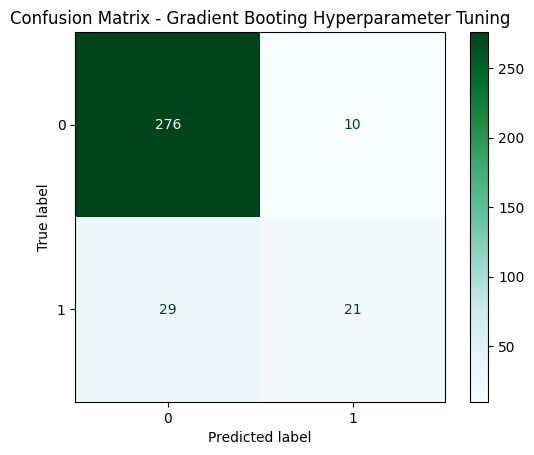

In [66]:
cm_train2 = confusion_matrix(y_test, y_pred_test2)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train2)
plt.figure(figsize=(6, 4))
disp.plot(cmap='BuGn', values_format='d')
plt.title("Confusion Matrix - Gradient Booting Hyperparameter Tuning")
plt.show()

<div align="justify">

Berdasarkan confusion matrix hasil model Gradient Boosting setelah hyperparameter tuning, diperoleh:

1. True Negative (TN) = 276

    Sebanyak 276 data kelas 0 (tidak merespon) diprediksi dengan benar oleh model.

2. False Positive (FP) = 10

    Ada 10 data yang sebenarnya kelas 0, tetapi diprediksi sebagai kelas 1 (merespon).

3. False Negative (FN) = 29

    Sebanyak 29 data yang sebenarnya kelas 1 diprediksi sebagai kelas 0.

4. True Positive (TP) = 21

    Sebanyak 21 data kelas 1 berhasil diprediksi dengan benar.

Perbandingan dengan Baseline

1. Pada baseline, TP = 13 dan FN = 37. Setelah tuning, TP naik menjadi 21 dan FN turun menjadi 29.

2. Artinya, recall untuk kelas minoritas meningkat, sehingga model menjadi lebih baik dalam mengenali pelanggan yang benar-benar merespon kampanye.

3. Meskipun FP sedikit naik (dari 9 menjadi 10), peningkatan ini relatif kecil dibandingkan kenaikan kemampuan mendeteksi kelas 1.

In [67]:
# F1 Score Report
f1_train2 = f1_score(y_train, y_pred_train2, average='binary', zero_division=0)
f1_test2 = f1_score(y_test,  y_pred_test2,  average='binary', zero_division=0)

print(f"F1 Gradient Boosting (Hyperparameter Tuning) Train-Set: {f1_train2:.4f}")
print(f"F1 Gradient Boosting (Hyperparameter Tuning) Test-Set : {f1_test2:.4f}")

# ROC-AUC Score
roc_auc2 = roc_auc_score(y_test, y_proba2)
print(f"\nGradient Boosting ROC-AUC Score: {roc_auc2:.4f}")

# Interpretasi ROC-AUC
def interpret_roc_auc(score):
    if score > 0.9:
        return "Good"
    elif 0.8 <= score <= 0.9:
        return "Fair"
    elif 0.7 <= score < 0.8:
        return "Decent"
    elif 0.6 <= score < 0.7:
        return "Not Great"
    else:
        return "Poor"

print("Gradient Boosting (Hyperparameter Tuning) ROC-AUC Performance:", interpret_roc_auc(roc_auc2))

F1 Gradient Boosting (Hyperparameter Tuning) Train-Set: 0.9487
F1 Gradient Boosting (Hyperparameter Tuning) Test-Set : 0.5185

Gradient Boosting ROC-AUC Score: 0.8567
Gradient Boosting (Hyperparameter Tuning) ROC-AUC Performance: Fair


<div align="justify">

Berdasarkan hasil evaluasi model Gradient Boosting setelah hyperparameter tuning:

- **F1 Score Train = 0.9487**

    Menunjukkan bahwa model dapat menyeimbangkan precision dan recall dengan sangat baik pada data latih.

- **F1 Score Test = 0.5185**

    Terjadi peningkatan signifikan dibanding baseline (0.3611), terutama karena recall untuk kelas minoritas meningkat. Ini artinya model menjadi lebih baik dalam mengenali data kelas 1 meskipun dataset tidak seimbang.

- **ROC-AUC Score = 0.8567**

    Termasuk kategori Fair sesuai interpretasi, menunjukkan kemampuan model membedakan kelas positif dan negatif cukup baik.

#### Compare Before and After Tuning Visualisation

<div align="justify">

Setelah melakukan evaluasi terhadap kedua model, disini saya akan melakukan visualisasi untuk membandingkan F1 Score pada kedua model, yaitu model baseline dan model setelah dilakukan hyperparameter tuning. Tujuannya adalah untuk melihat secara jelas sejauh mana peningkatan performa yang dicapai setelah tuning, baik pada Train-Set (F1 Train) maupun Test-Set (F1 Test). Dengan visualisasi ini, perbedaan kinerja kedua model dapat diamati dengan lebih mudah dan cepat, sehingga memudahkan dalam mengevaluasi efektivitas proses tuning yang telah dilakukan, khususnya dalam konteks data yang imbalanced.

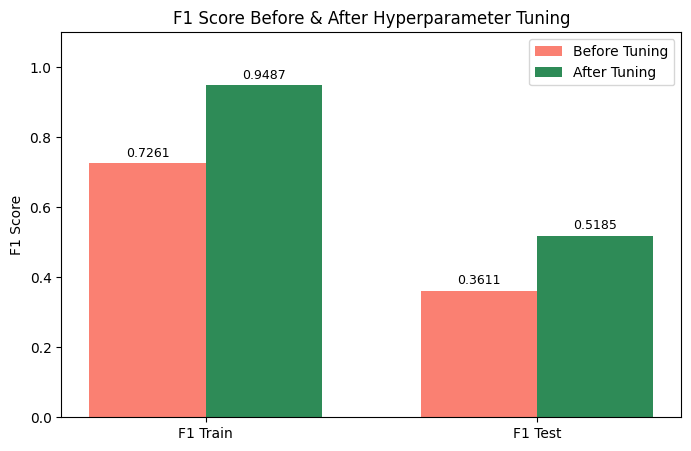

In [68]:
# Data dari evaluasi
metrics = ["F1 Train", "F1 Test"]

# Before tuning
before = [f1_train, f1_test]

# After tuning
after = [f1_train2, f1_test2]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))

bars1 = ax.bar(x - width/2, before, width, label='Before Tuning', color='salmon')
bars2 = ax.bar(x + width/2, after, width, label='After Tuning', color='seagreen')

# Label sumbu dan judul
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score Before & After Hyperparameter Tuning')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Menampilkan nilai di atas bar
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.4f}", 
                ha='center', va='bottom', fontsize=9)

plt.ylim(0, 1.1)
plt.show()


<div align="justify">

Hasil visualisasi grafik ini menunjukkan perbandingan F1-Score sebelum dan sesudah dilakukan hyperparameter tuning pada model Gradient Boosting.

1. **F1 Score Train**

- Sebelum tuning: 0.7261

- Sesudah tuning: 0.9487

Terjadi peningkatan cukup besar pada data latih. Ini berarti model menjadi jauh lebih baik dalam menyeimbangkan precision dan recall pada data yang digunakan untuk training.

2. **F1 Score Test**

- Sebelum tuning: 0.3611

- Sesudah tuning: 0.5185

Peningkatan F1 Test dari 0.3611 menjadi 0.5185 menandakan bahwa tuning hyperparameter berhasil mengurangi bias model terhadap kelas mayoritas. Dengan kata lain, model sekarang lebih seimbang antara memprediksi kelas mayoritas (0) dan mendeteksi kelas minoritas (1), meskipun masih terdapat gap antara train dan test yang mengindikasikan potensi `overfitting`. Hasil ini menunjukkan bahwa model Gradient Boosting yang telah dituning berhasil meningkatkan kemampuannya dalam mengenali pelanggan yang berpotensi merespons positif terhadap kampanye pemasaran.

## 8. Model Saving

<div align="justify">

Hasil Pipeline model Gradient Boost Setelah Hyperparameter Tuning Disimpan dalam bentuk pickle untuk model inference.

In [69]:
# Menyimpan model terbaik
DEPLOY_DIR = Path.cwd() / "deployment"
DEPLOY_DIR.mkdir(parents=True, exist_ok=True)

save_path = DEPLOY_DIR / "best_model.pkl"
with open(save_path, "wb") as f:
    pickle.dump(best_model, f)
print("saved to:", save_path)

saved to: /Users/alghfrimh/Folder GitHub/Public File/Customer-Response-Prediction-for-Marketing-Campaigns/deployment/best_model.pkl


## 9. Conclusion

<div align="justify">

### 9.1 Cross-Validation

Berdasarkan evaluasi awal menggunakan cross-validation pada lima algoritma (KNN, SVM, Decision Tree, Random Forest, dan Gradient Boosting), diperoleh hasil bahwa Gradient Boosting memiliki performa rata-rata F1-score tertinggi (mean F1 = 0.4937, std = 0.0354), diikuti oleh Random Forest (mean F1 = 0.4631, std = 0.0512). Kedua model ini tidak hanya unggul secara skor, tetapi juga menunjukkan standar deviasi yang relatif rendah, menandakan konsistensi performa di berbagai fold cross-validation. Sementara itu, KNN dan SVM mencatatkan skor F1 yang paling rendah, menunjukkan bahwa model tersebut kurang cocok untuk dataset ini.

<div align="justify">

### 9.2 Model Evaluation

**Kelebihan Model**

1. Performa Tinggi pada Data Imbalanced

    Gradient Boosting menunjukkan F1-score tertinggi di antara semua model baseline, yang berarti mampu menjaga keseimbangan antara precision dan recall — penting untuk kasus klasifikasi pelanggan dengan distribusi kelas yang tidak seimbang.

2. Konsistensi Performa

    Standar deviasi F1-score relatif rendah pada hasil cross-validation, mengindikasikan stabilitas prediksi di berbagai subset data.

3. Kemampuan Menangkap Pola Non-Linear

    Model mampu mempelajari interaksi kompleks antar fitur demografis, perilaku pembelian, dan riwayat campaign, sehingga prediksi menjadi lebih akurat.

4. Meningkat Signifikan Setelah Tuning

    Hyperparameter tuning berhasil meningkatkan performa model, khususnya pada F1-score test, sehingga prediksi terhadap kelas minoritas menjadi lebih baik.

**Kekurangan Model**

1. Potensi Overfitting

    Perbedaan yang cukup besar antara F1-score train dan test setelah tuning menunjukkan model bisa terlalu fit terhadap data latih, sehingga performa di data baru mungkin turun.

2. Kompleksitas Model Tinggi

    Gradient Boosting membutuhkan waktu training dan prediksi yang lebih lama dibanding model sederhana seperti Decision Tree atau KNN, sehingga kurang efisien jika dataset jauh lebih besar di masa yang akan datang.

3. Sensitif terhadap Parameter dan Data Baru

    Performa model sangat bergantung pada pemilihan hyperparameter dan kualitas data. Perubahan distribusi data pelanggan di masa depan dapat menurunkan akurasi jika model tidak diperbarui.

<div align="justify">

### 9.3 Baseline vs Hyperparameter Tuning Model

Setelah dilakukan hyperparameter tuning pada model terbaik (Gradient Boosting), terjadi peningkatan signifikan pada performa:

1. F1-Score Train: naik dari 0.7261 menjadi 0.9487, menunjukkan kemampuan model yang jauh lebih baik dalam menyeimbangkan precision dan recall pada data latih.

2. F1-Score Test: naik dari 0.3611 menjadi 0.5185, menandakan adanya peningkatan kemampuan model dalam mendeteksi kelas minoritas dan mengurangi bias terhadap kelas mayoritas.

Meskipun terdapat peningkatan signifikan, masih ada gap antara train dan test yang menunjukkan potensi overfitting, sehingga perlu perhatian lebih pada tahap deployment agar model tetap generalizable.

<div align="justify">

### 9.4 Inference Result

Model yang sudah di-tuning kemudian digunakan untuk melakukan inference terhadap dua sample data pelanggan:

- Customer 1 (Master’s degree, Married, income tinggi, pengeluaran besar terutama pada wine, frekuensi belanja di store tinggi, dan beberapa kali menerima campaign sebelumnya). 

    Hasil prediksi menunjukkan bahwa customer akan merespons campaign berikutnya dengan probabilitas 77.40%. Hal ini dapat dijelaskan karena profil Customer 1 menunjukkan tingkat loyalitas dan engagement tinggi terhadap produk, terutama kategori premium seperti wine, serta memiliki riwayat positif terhadap campaign sebelumnya.

- Customer 2 (Basic education, Other marital status, income rendah, pengeluaran sangat kecil, mayoritas kategori produk tidak dibeli, engagement rendah, dan kampanye sebelumnya tidak terlalu berhasil).

    Hasil prediksi menunjukkan bahwa customer tidak akan merespons campaign berikutnya dengan probabilitas 7.34%. Rendahnya probabilitas ini selaras dengan rendahnya tingkat engagement, keterbatasan daya beli, dan minimnya riwayat keberhasilan campaign sebelumnya.

<div align="justify">

### 9.5 Proposed Solution

Berdasarkan hasil analisis dan prediksi model, rekomendasi strategi pemasaran untuk tim marketing FMCG International adalah sebagai berikut:

1. Targetkan pelanggan dengan skor prediksi tinggi (probabilitas > 60%) untuk campaign eksklusif atau penawaran produk premium, seperti Customer 1. Hal ini dapat meningkatkan konversi dan return on marketing investment.

2. Optimalkan budget pemasaran dengan menghindari pengiriman penawaran ke pelanggan dengan probabilitas rendah (< 20%), seperti Customer 2. Sebaiknya, alokasikan effort untuk strategi retensi jangka panjang, misalnya dengan program edukasi produk atau promo awal untuk meningkatkan engagement mereka.

3. Gunakan F1-score sebagai metrik utama untuk memantau performa model di masa depan, guna menjaga keseimbangan antara precision (mengurangi salah target) dan recall (menangkap sebanyak mungkin calon pembeli potensial).

4. Lakukan pemantauan berkala terhadap distribusi data pelanggan baru dan update model secara periodik untuk mengantisipasi pergeseran tren perilaku konsumen.

5. Pertimbangkan A/B testing untuk membandingkan efektivitas campaign berbasis model prediksi vs campaign konvensional, agar perusahaan memiliki bukti kuantitatif terkait peningkatan efektivitas strategi pemasaran.